In [42]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import awkward as ak

In [43]:
#functions
def graph_error(info, shade):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".", color = shade)
    
def graph_data(datas, column):
    for data in datas:
        #clean-up
        title = data
        info = datas[data]
        
        #plotting
        mean = str(round(ak.mean(info),3))
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+ mean, density = True)
        shade = patches[0].get_facecolor()
        graph_error(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [44]:
#set-up
inFileName = "WZ0jQCD.root"
file = uproot.open(inFileName)

trees = file.keys()
branches = file[trees[0]]
information = branches.arrays()

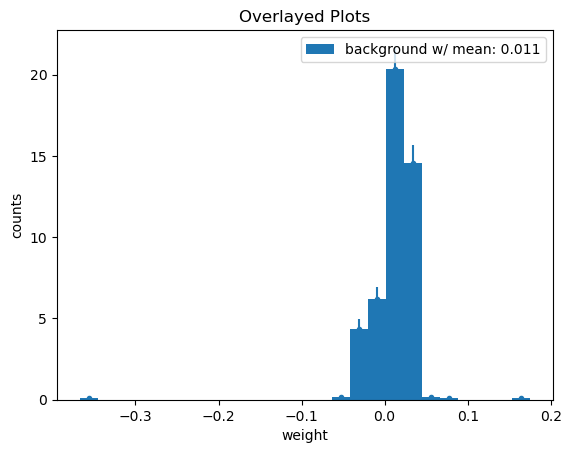

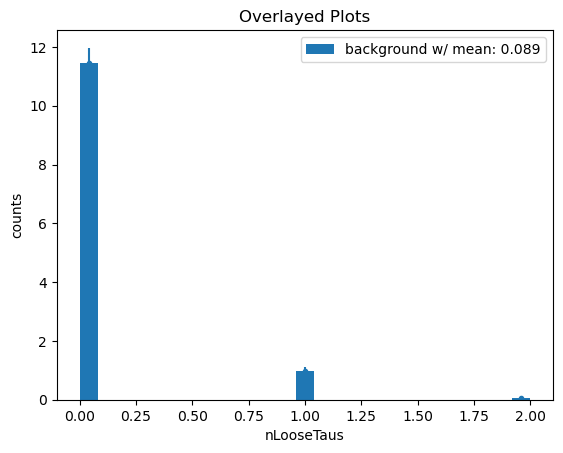

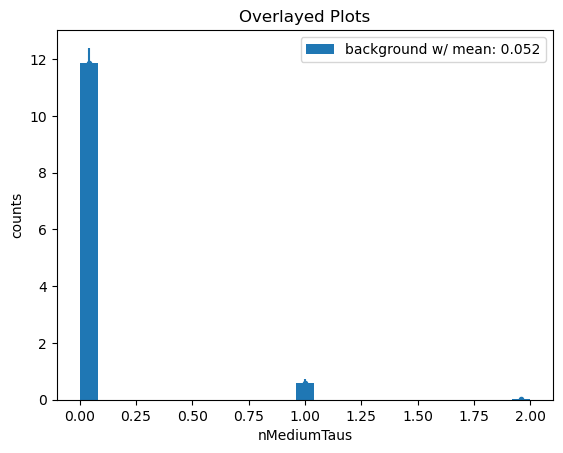

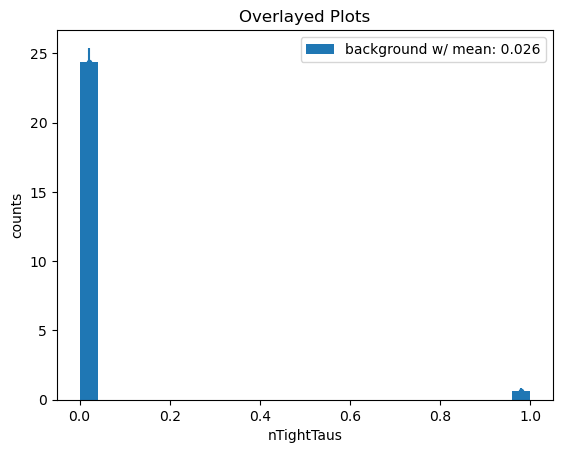

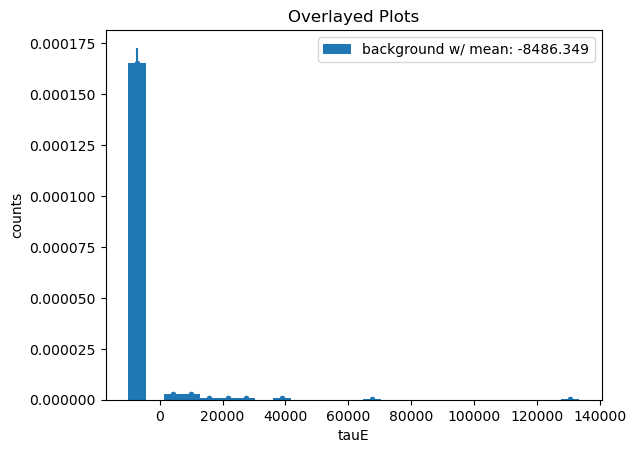

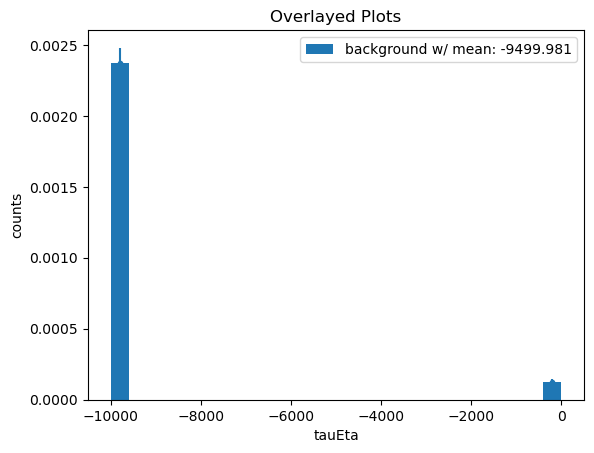

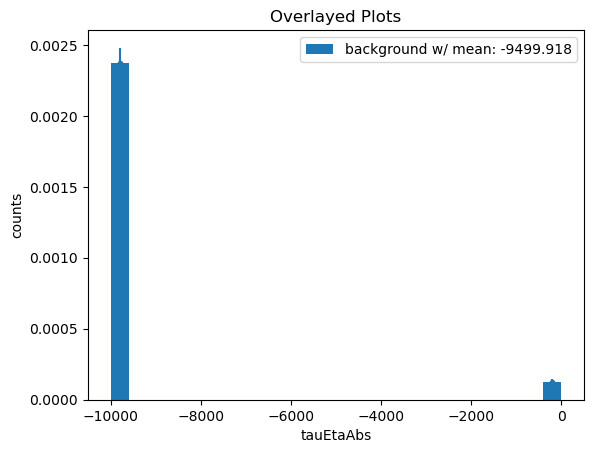

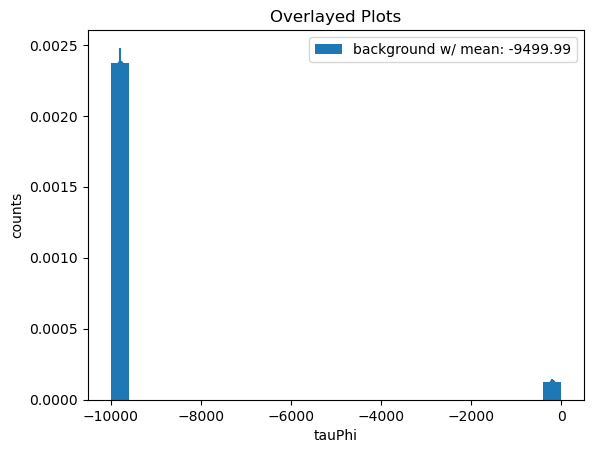

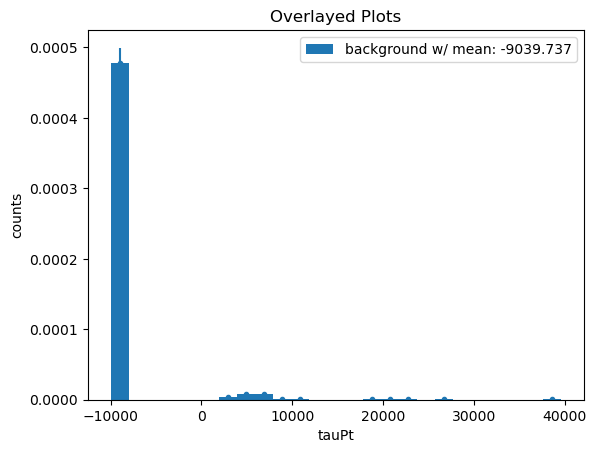

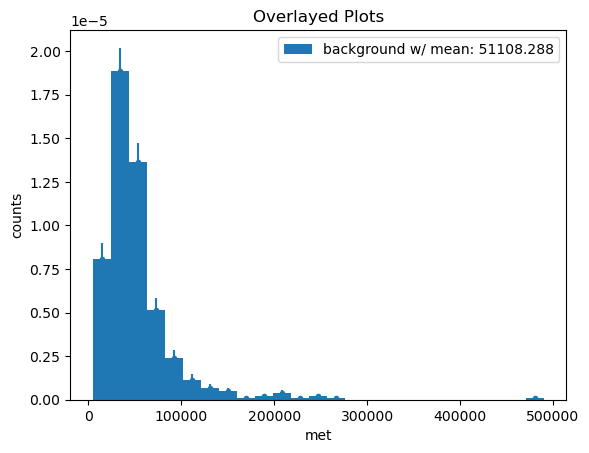

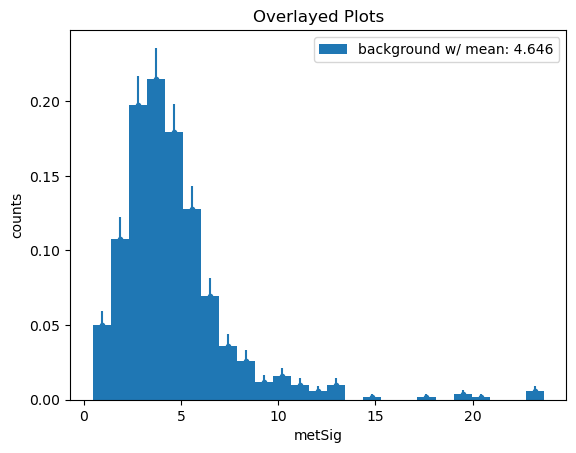

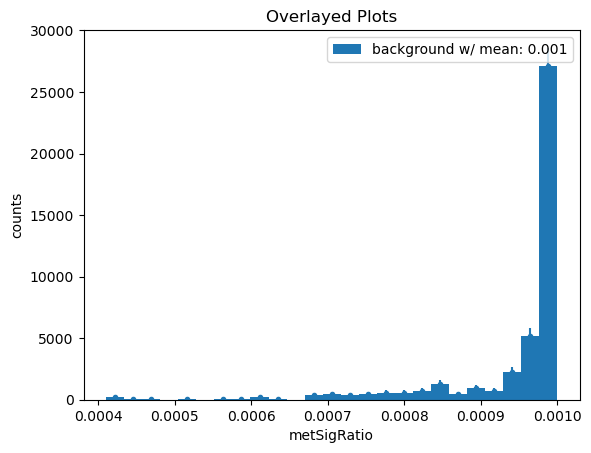

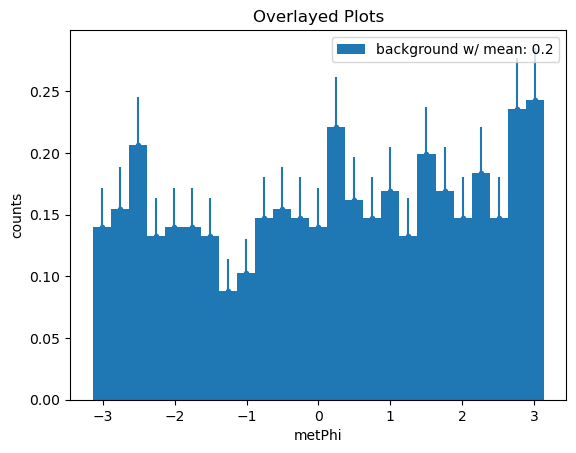

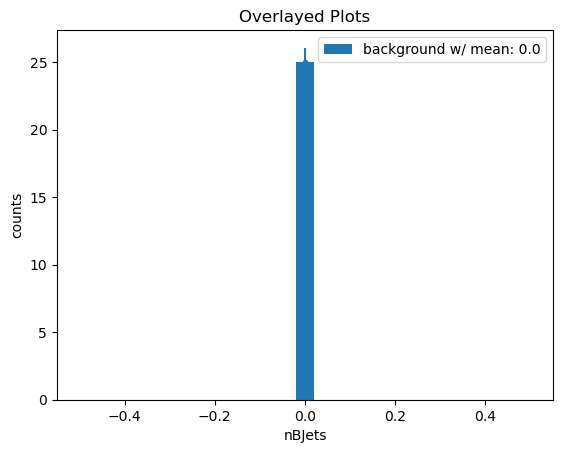

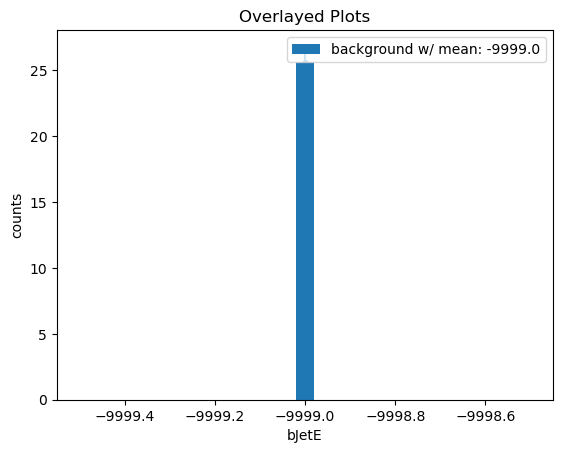

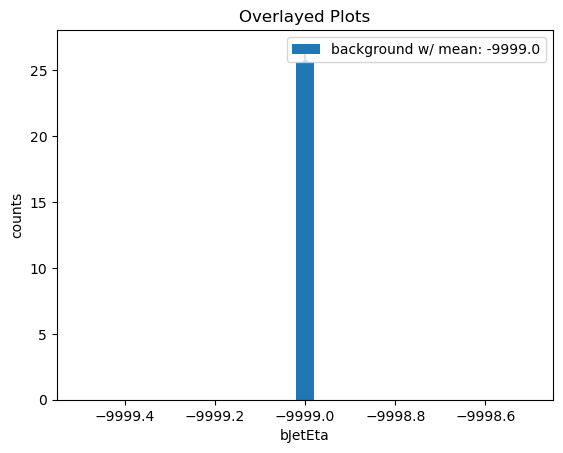

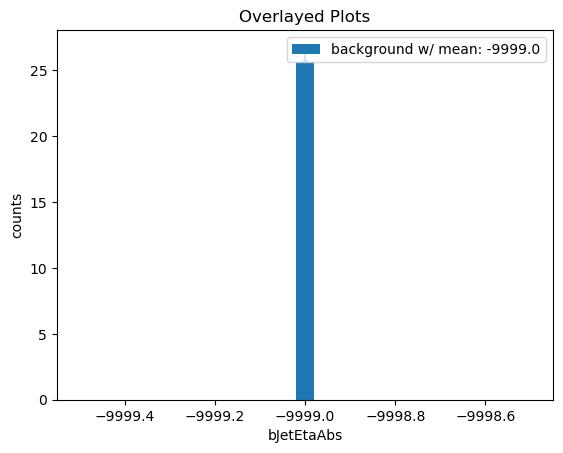

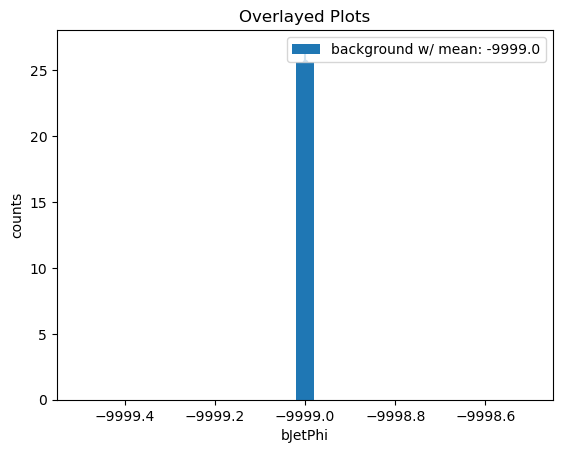

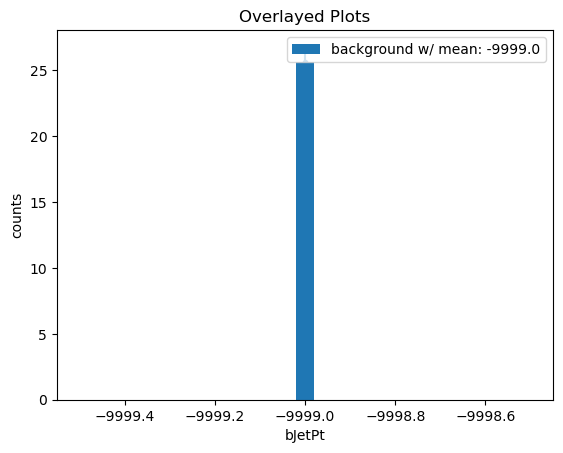

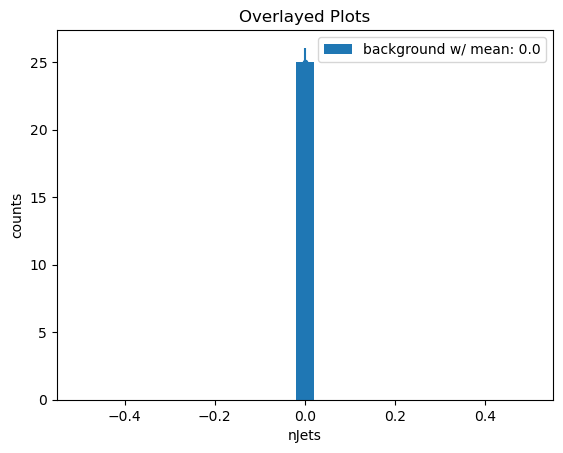

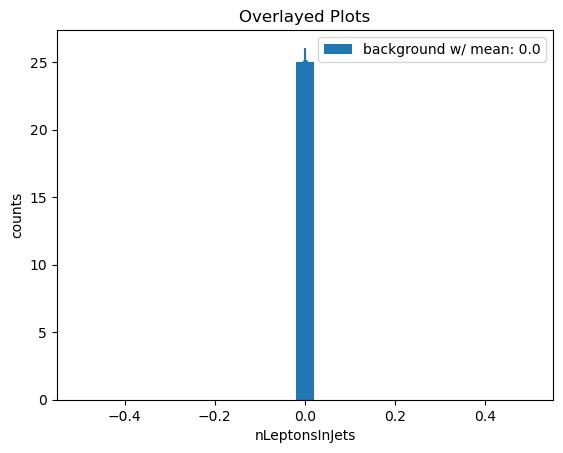

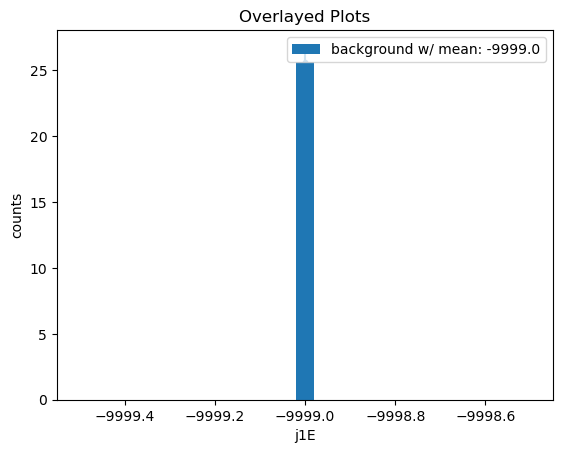

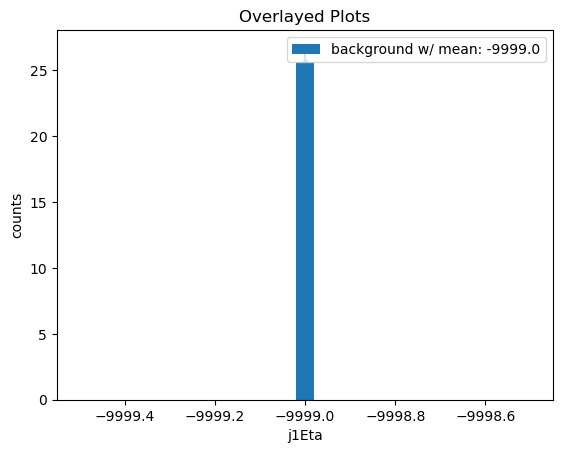

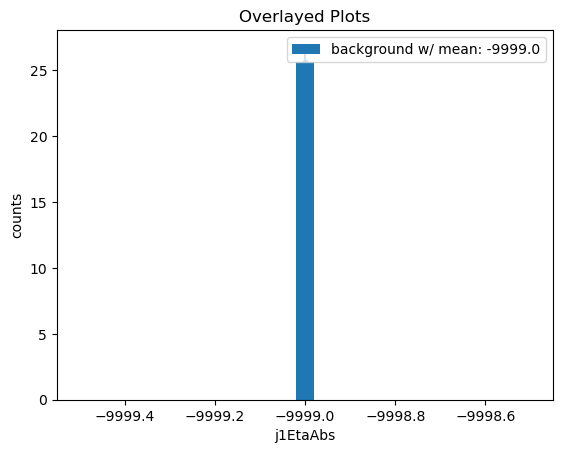

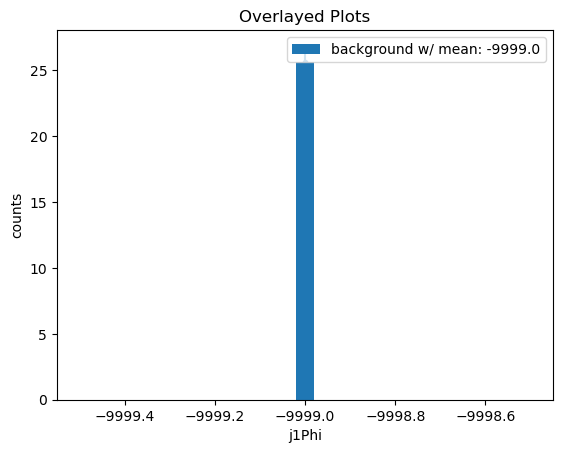

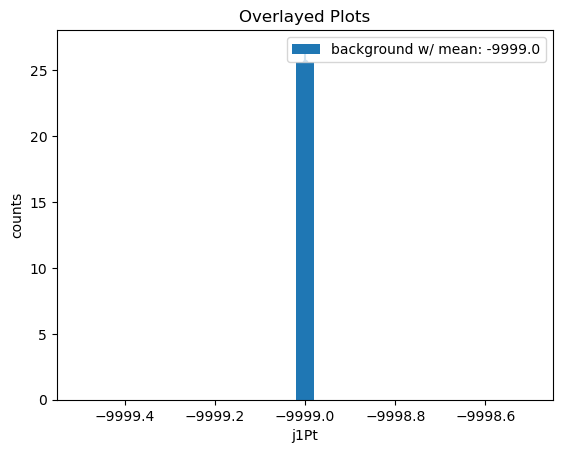

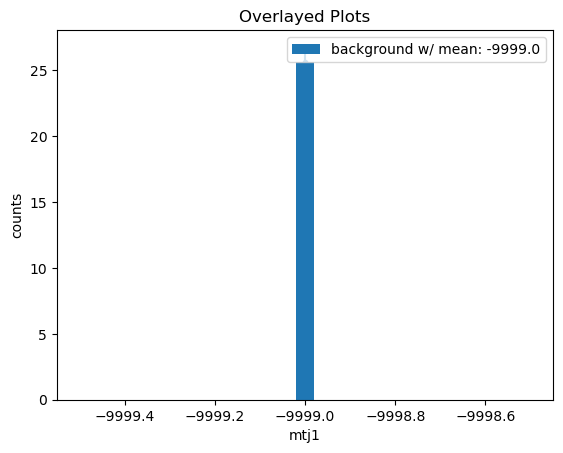

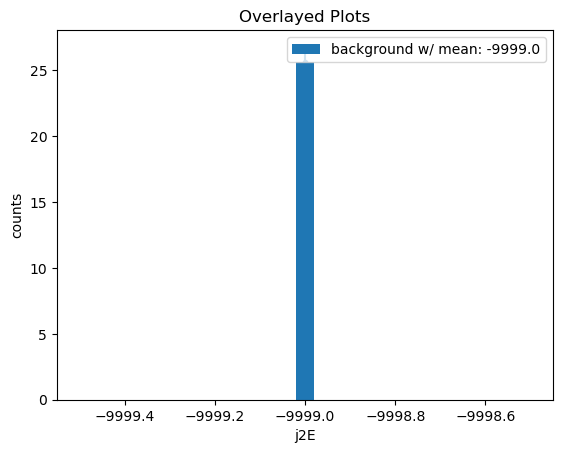

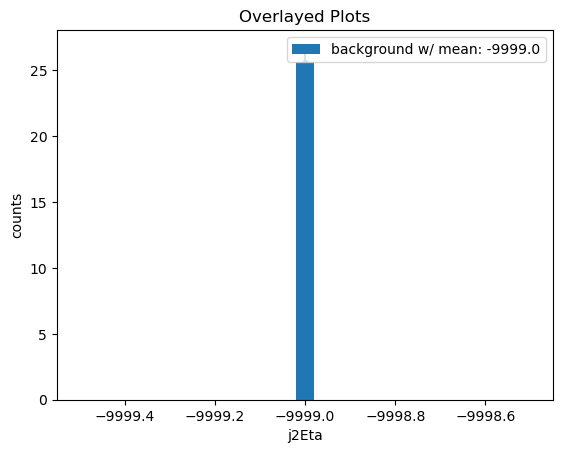

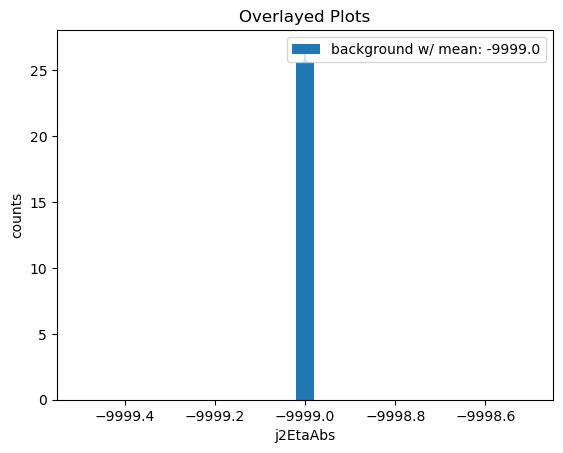

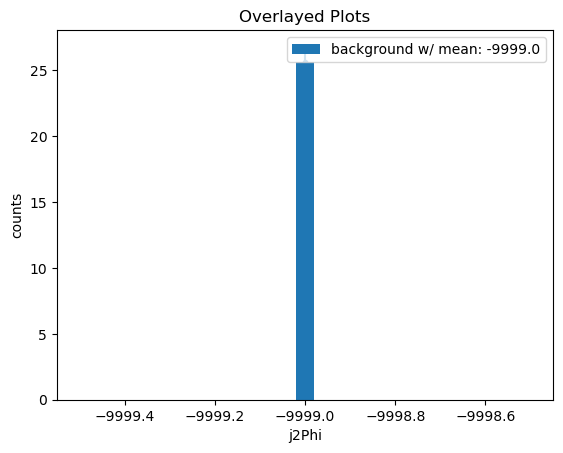

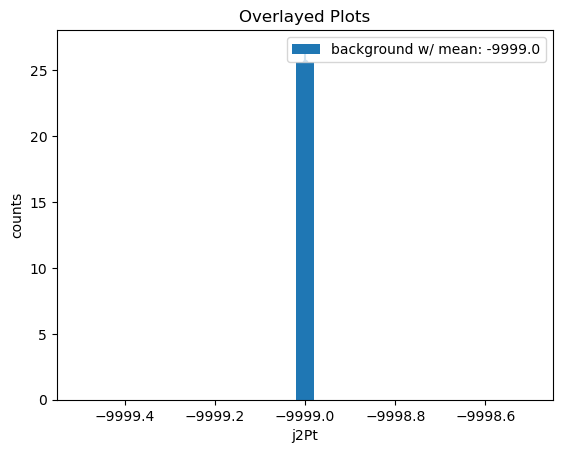

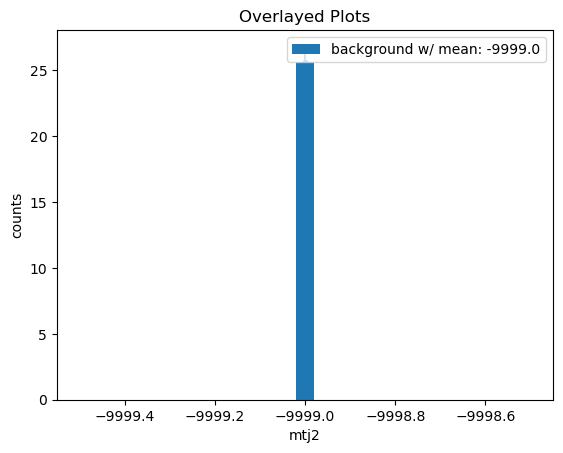

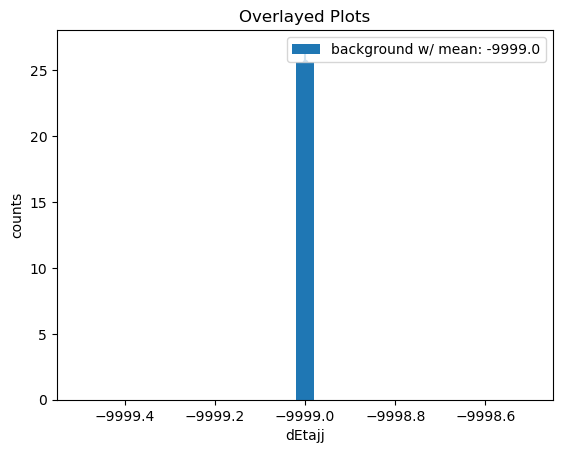

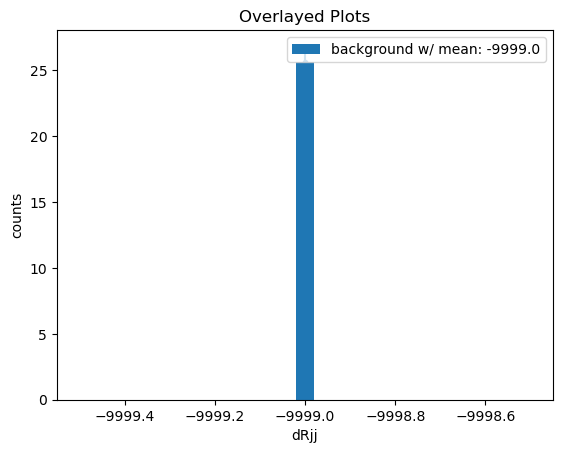

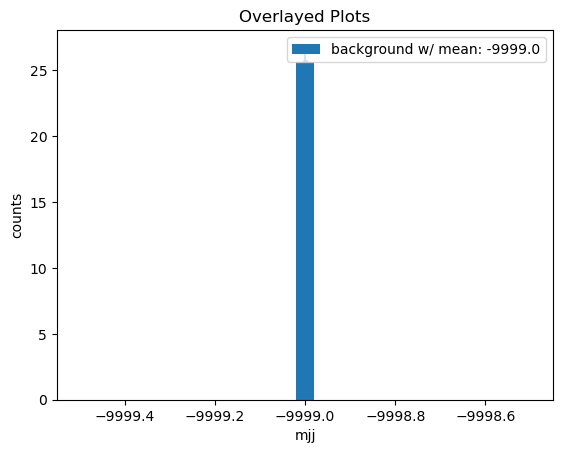

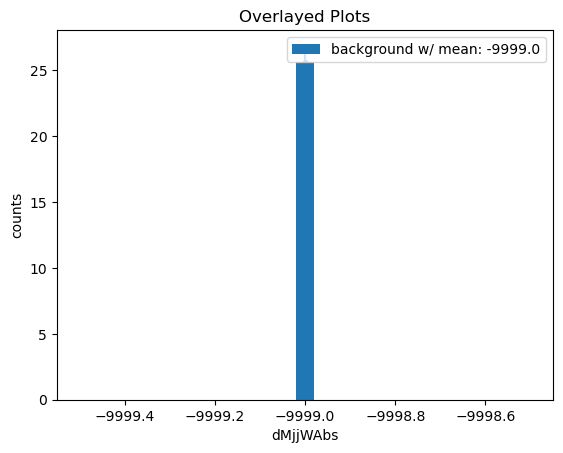

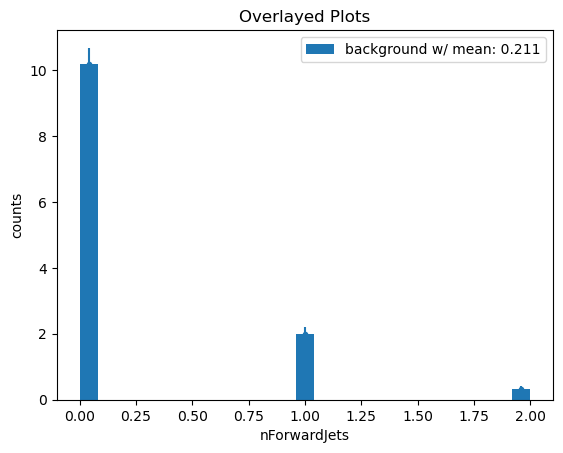

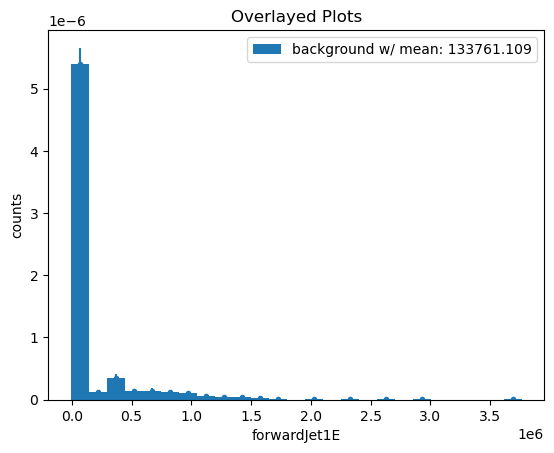

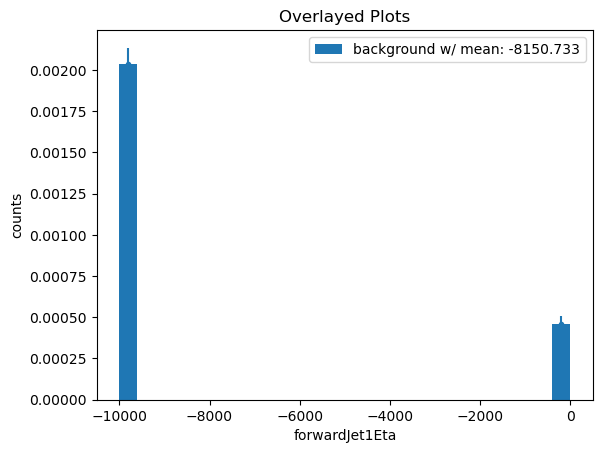

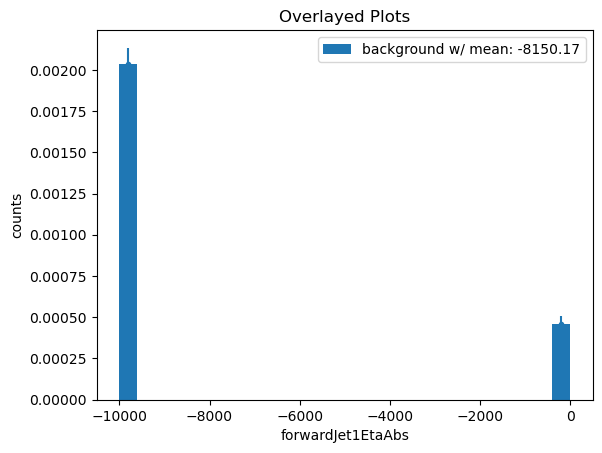

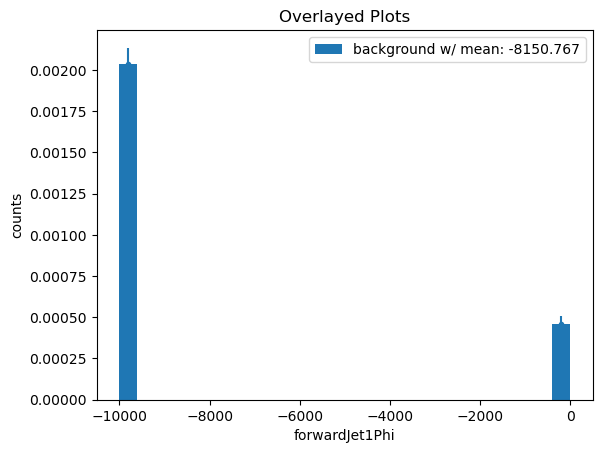

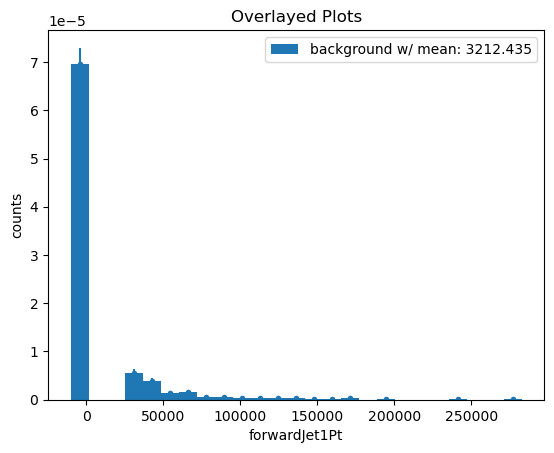

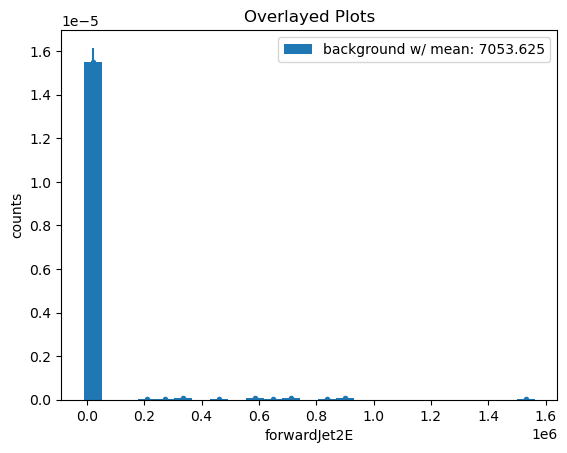

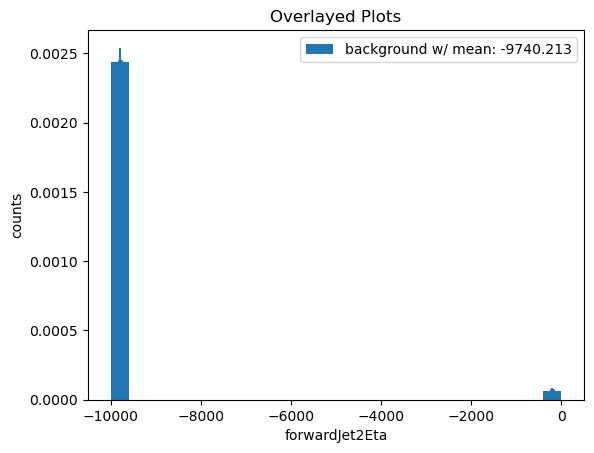

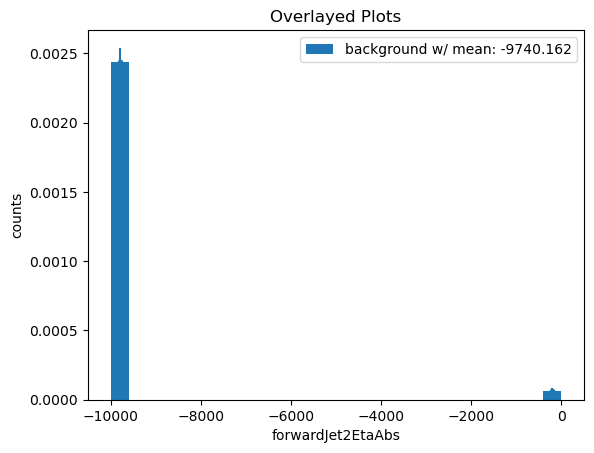

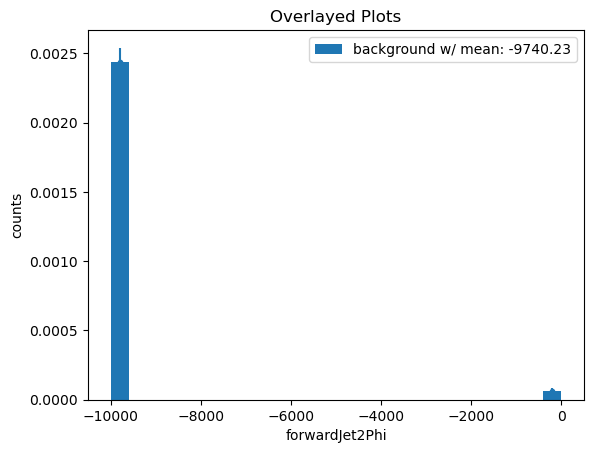

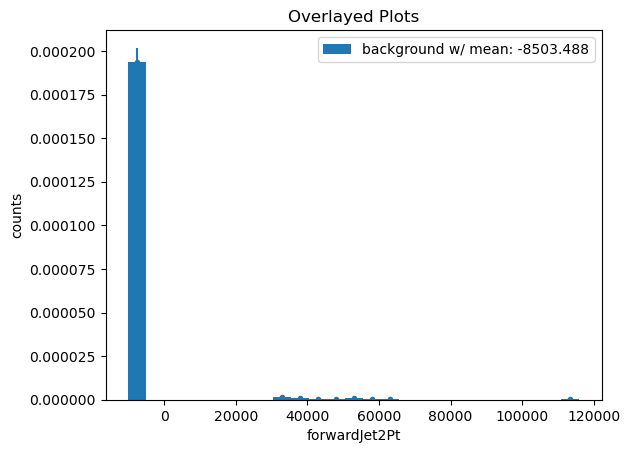

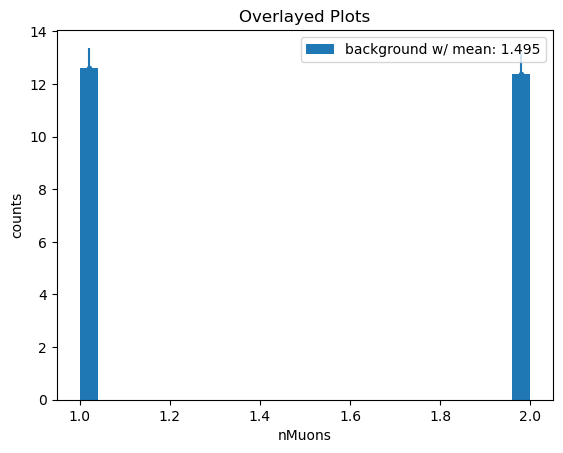

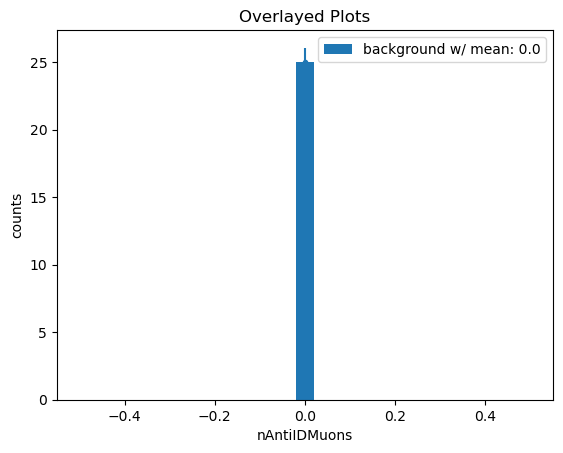

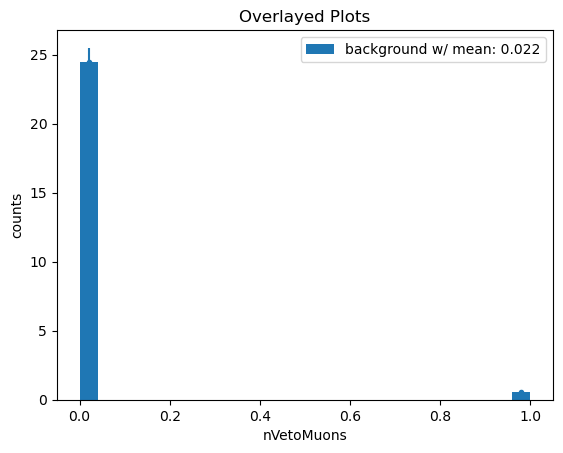

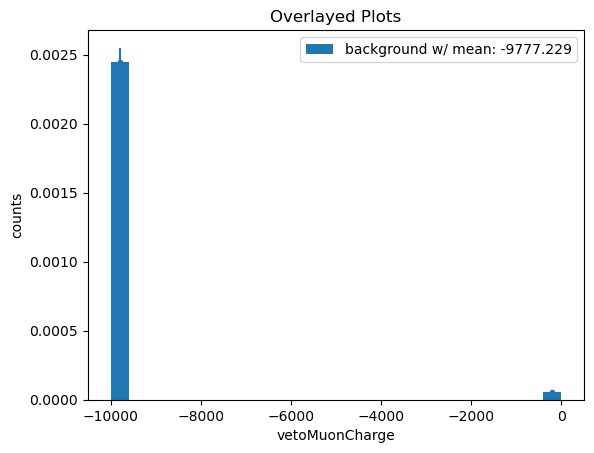

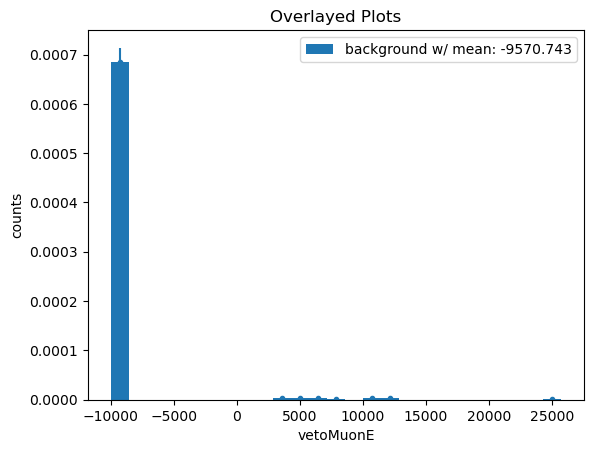

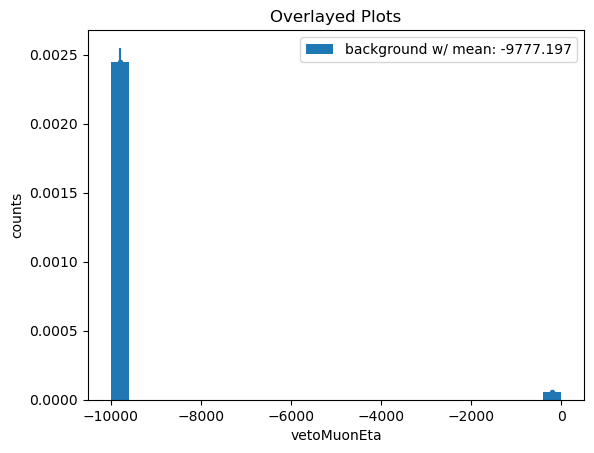

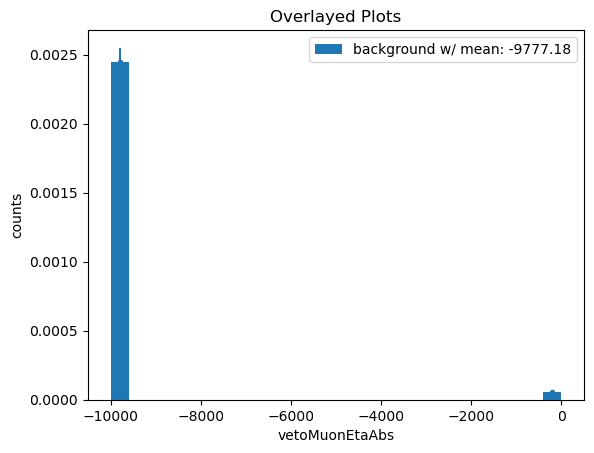

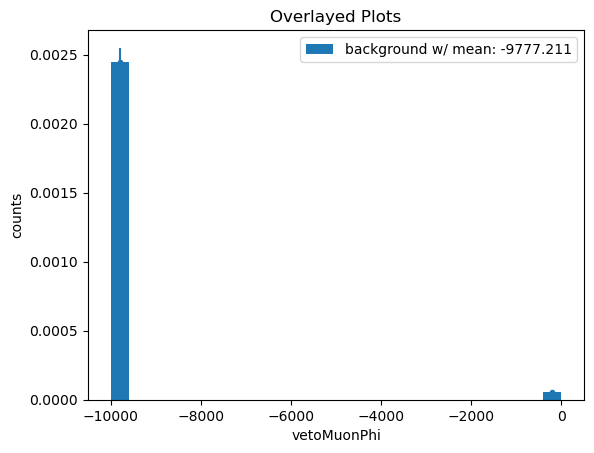

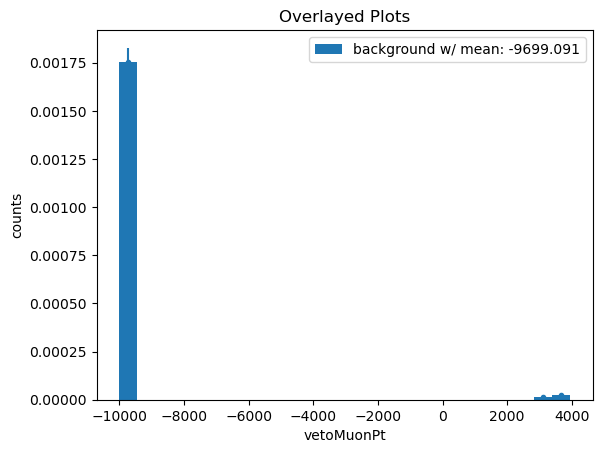

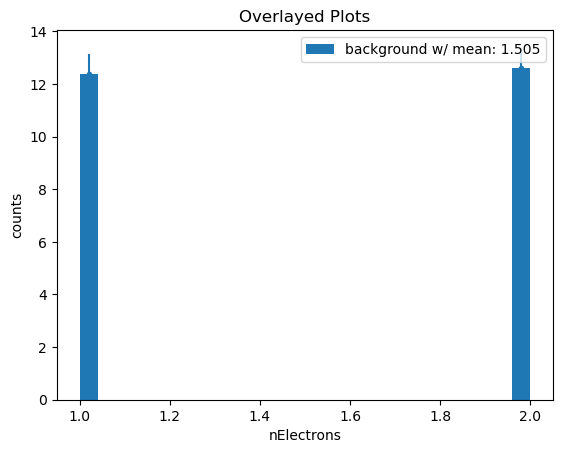

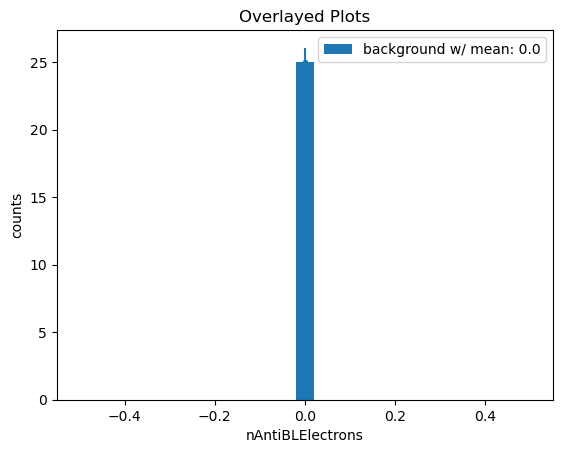

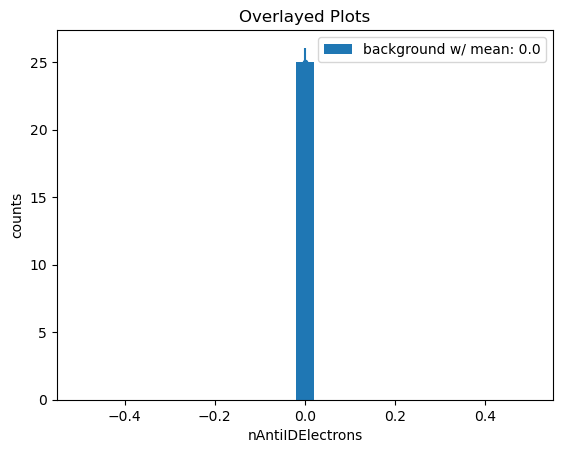

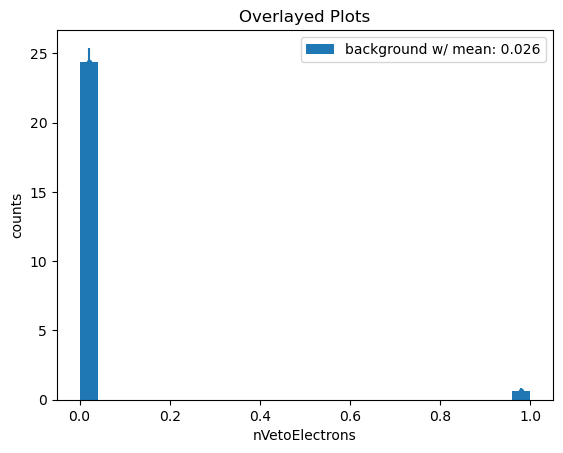

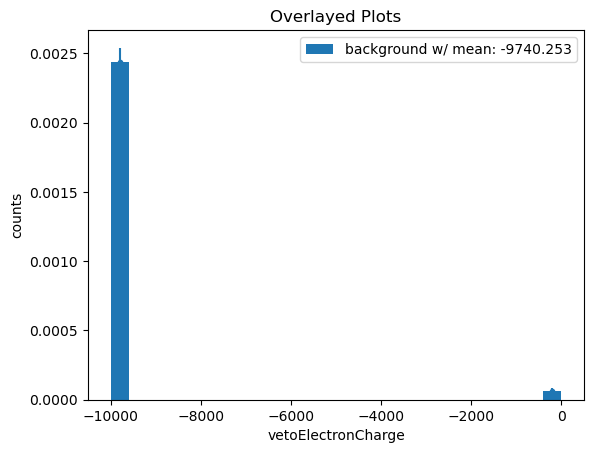

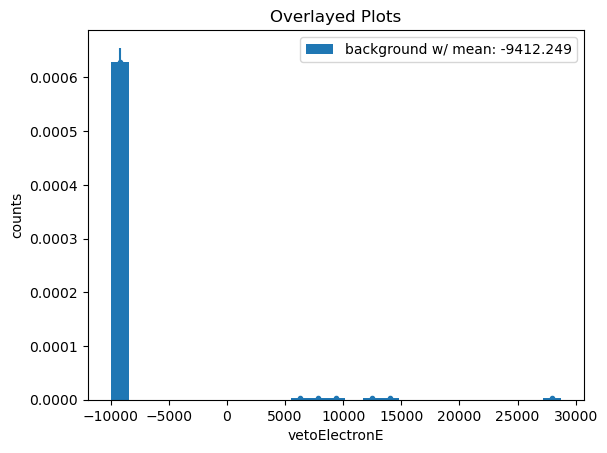

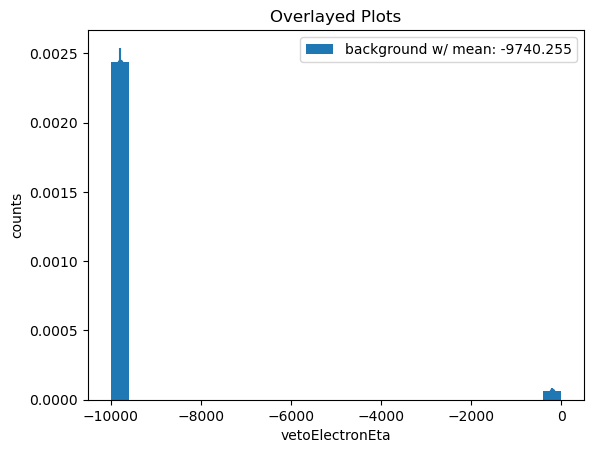

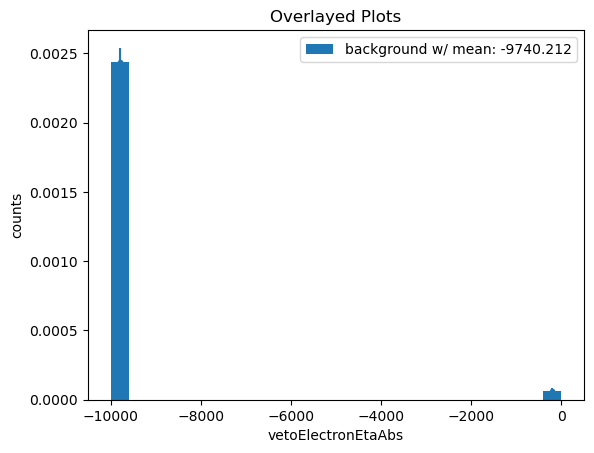

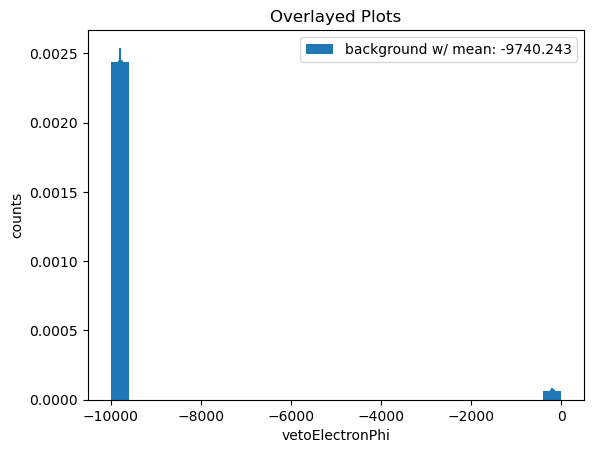

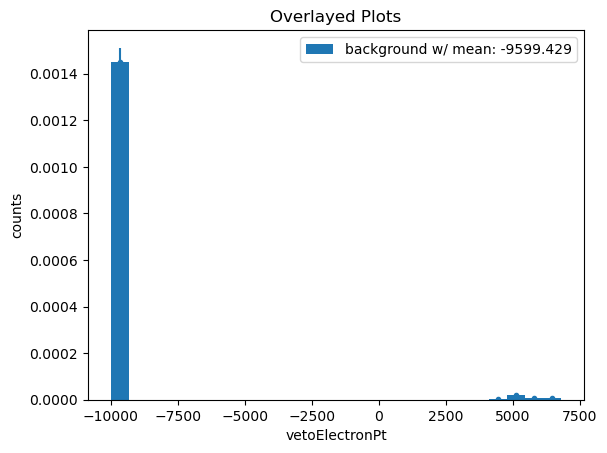

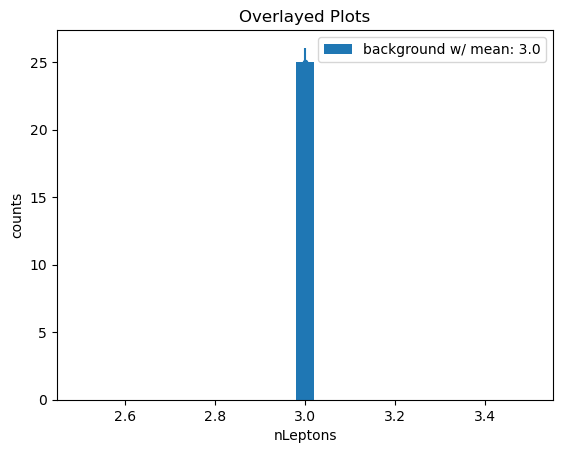

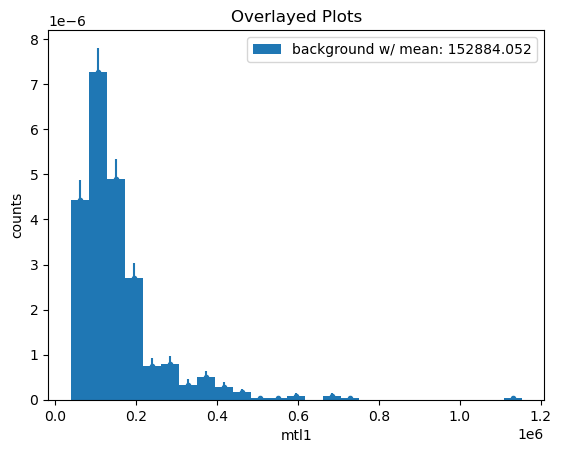

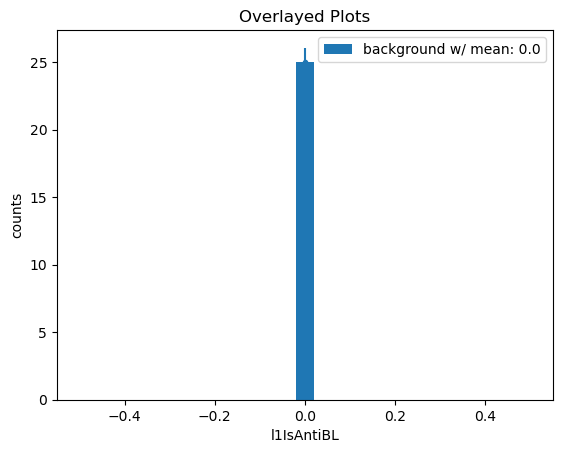

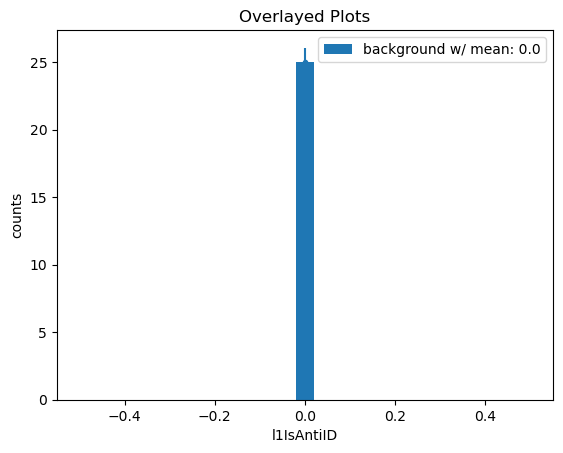

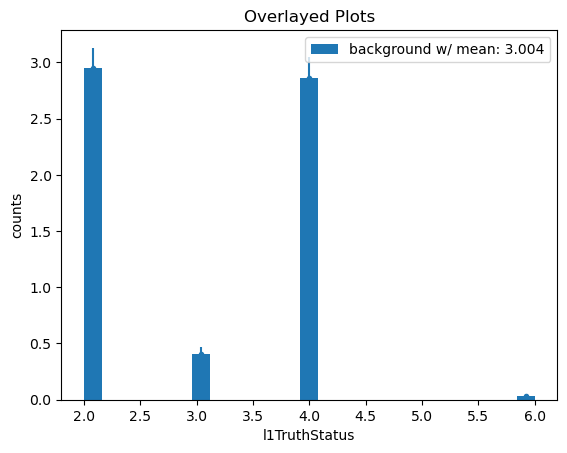

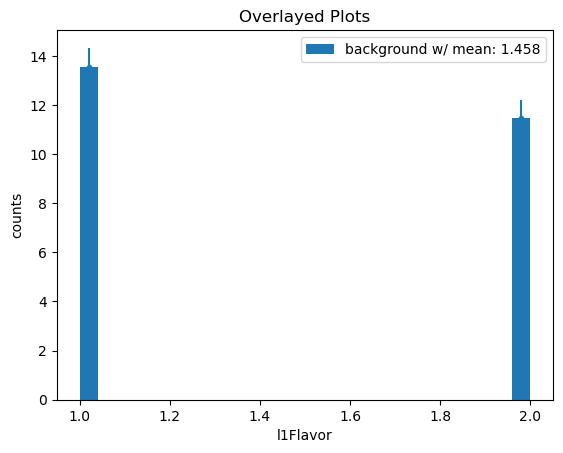

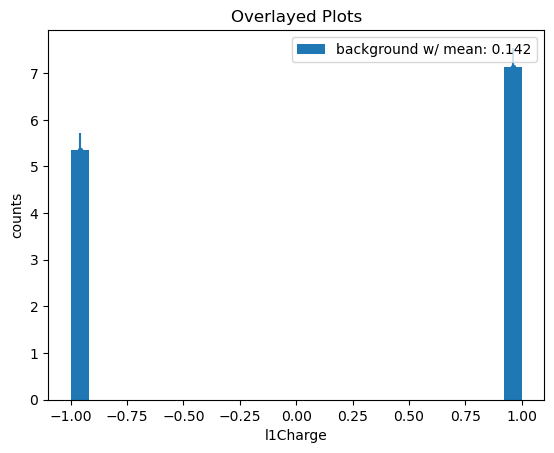

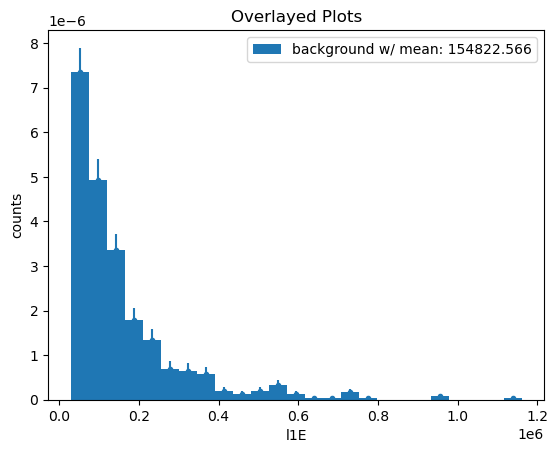

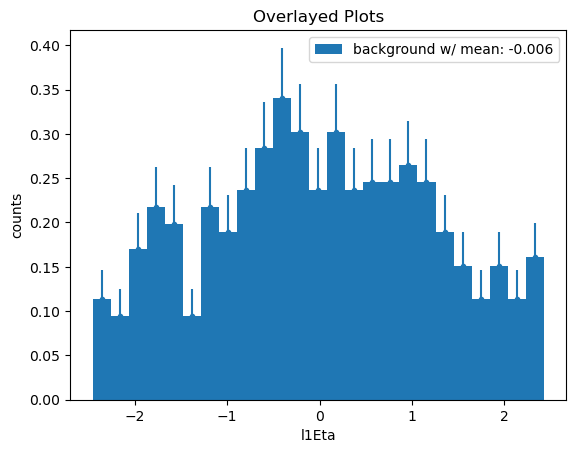

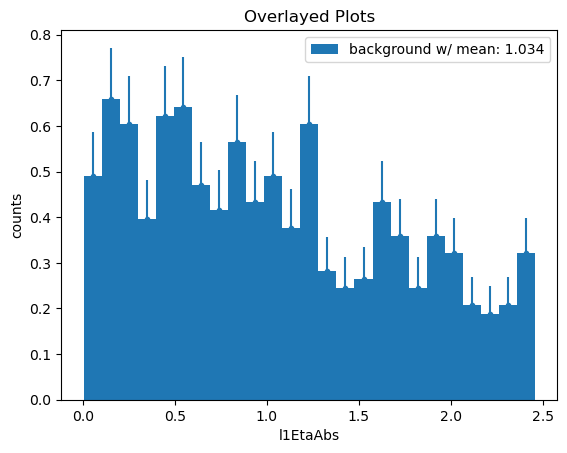

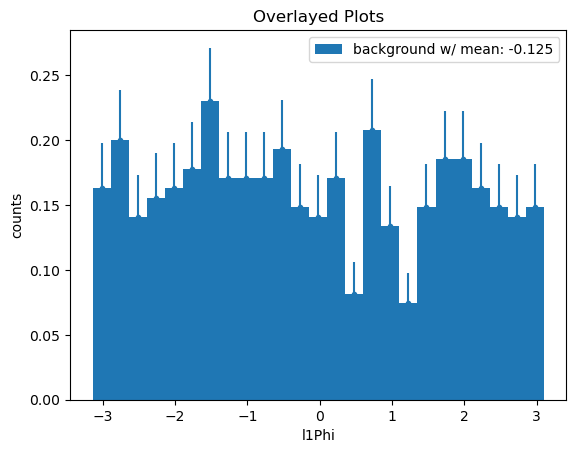

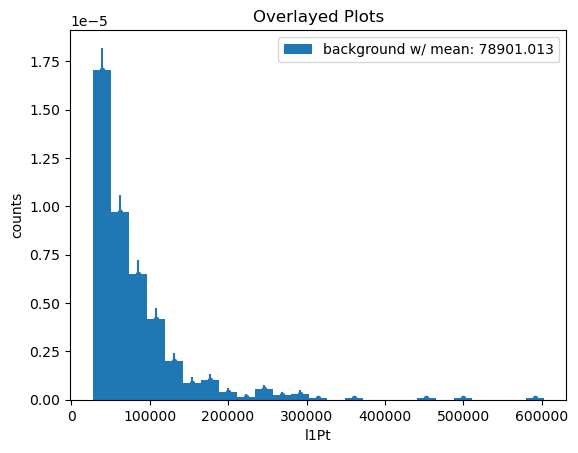

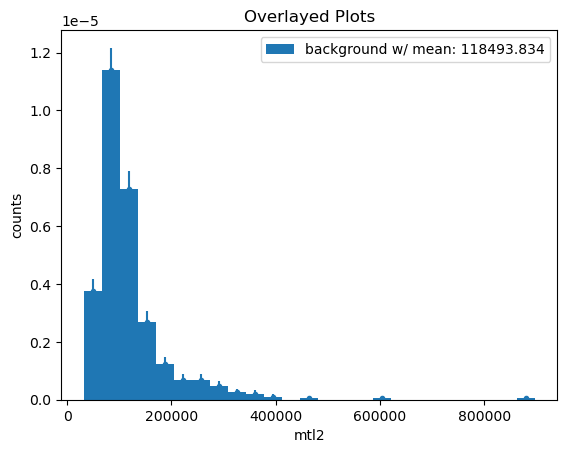

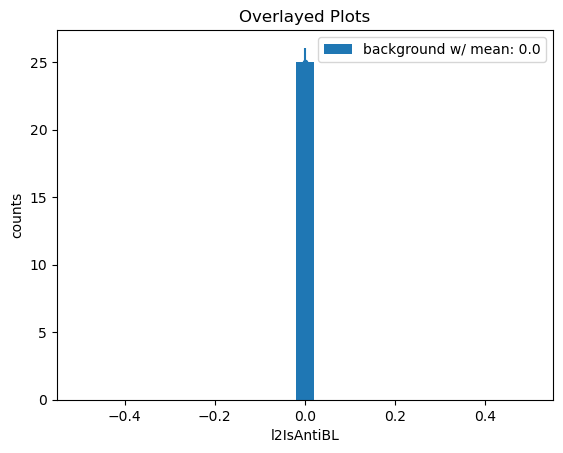

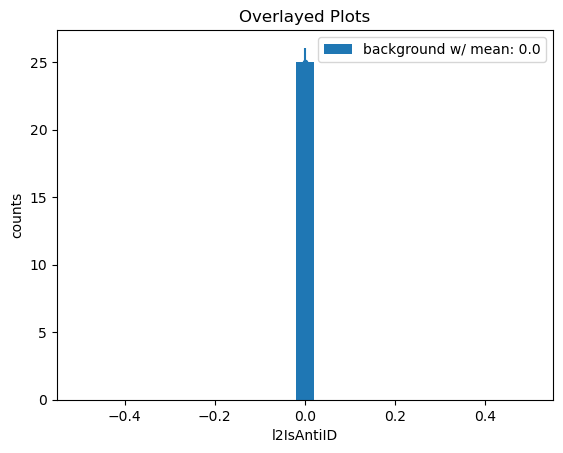

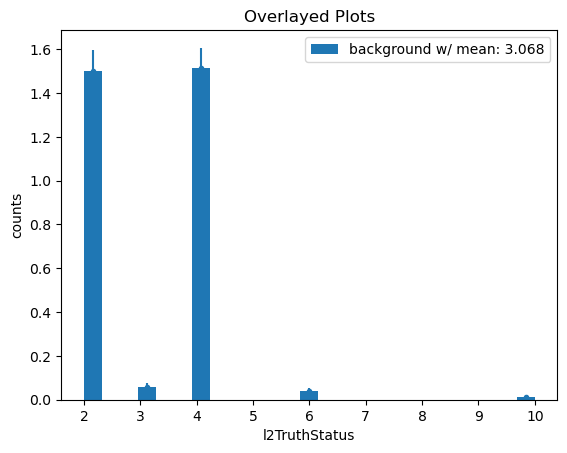

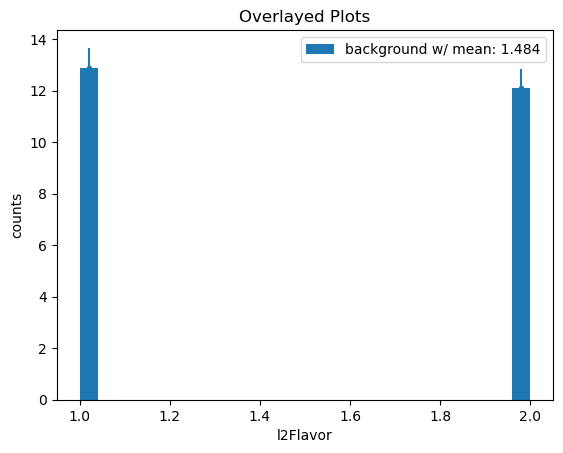

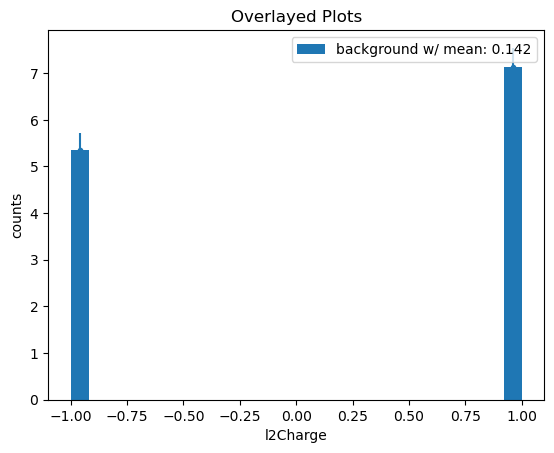

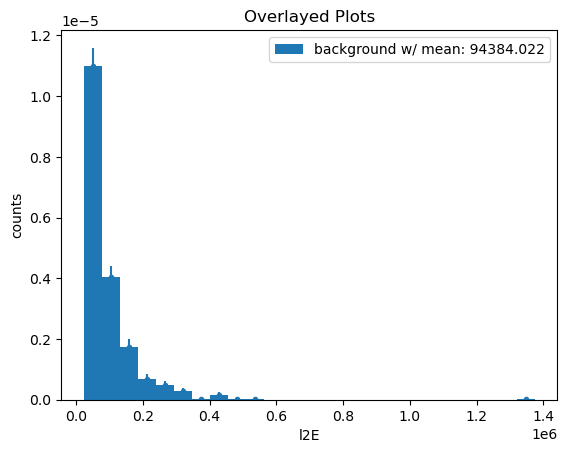

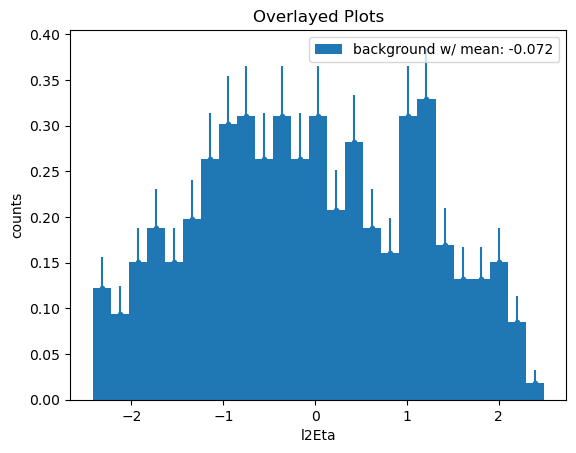

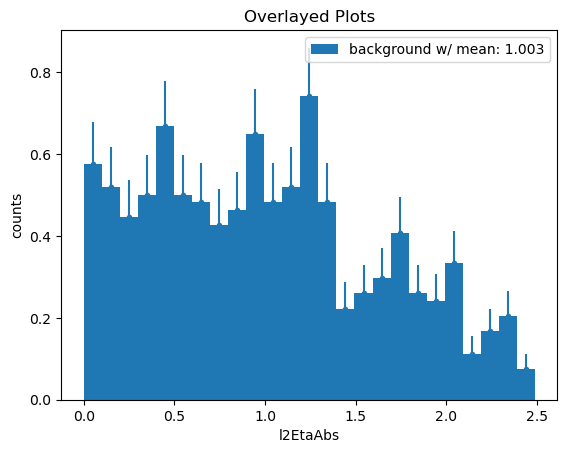

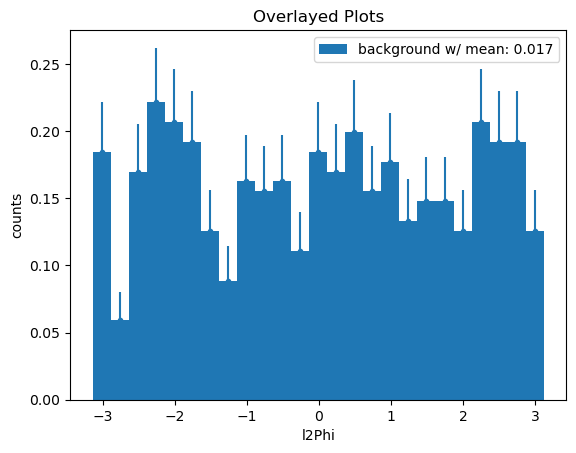

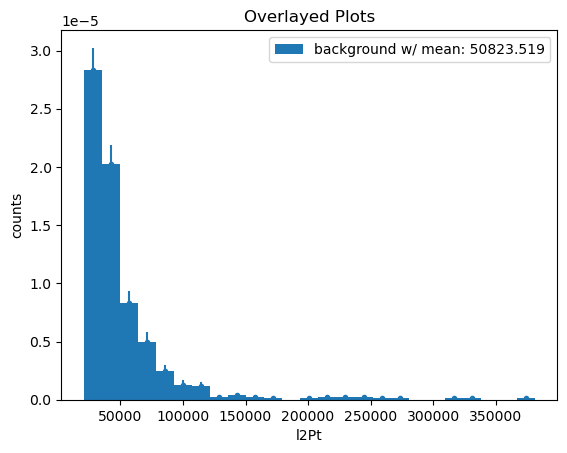

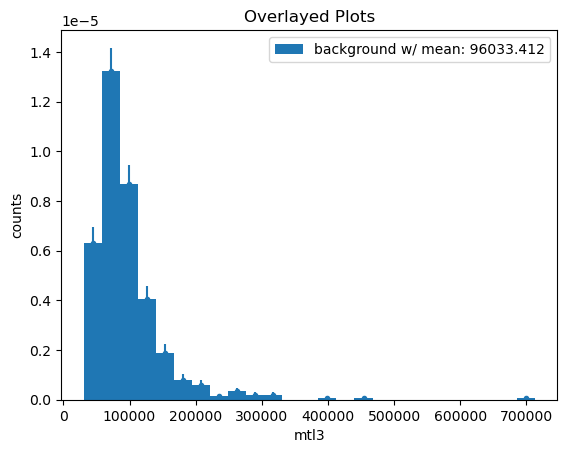

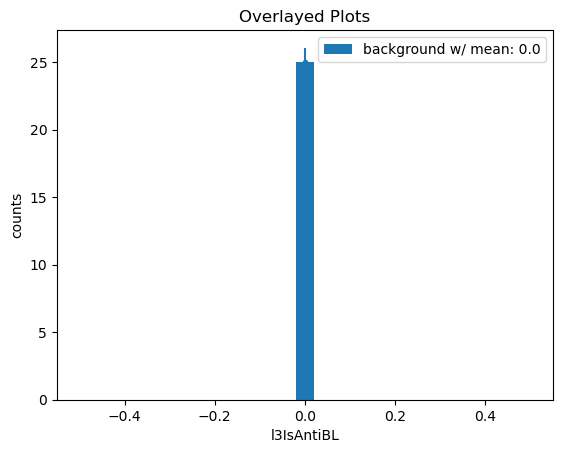

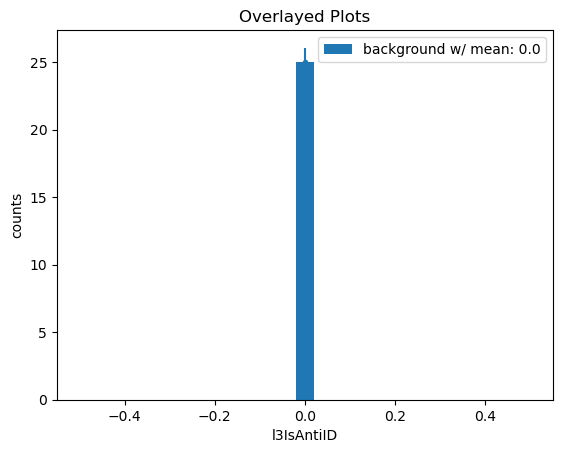

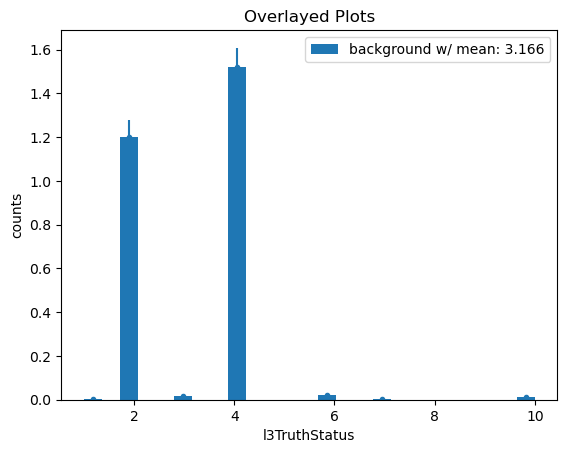

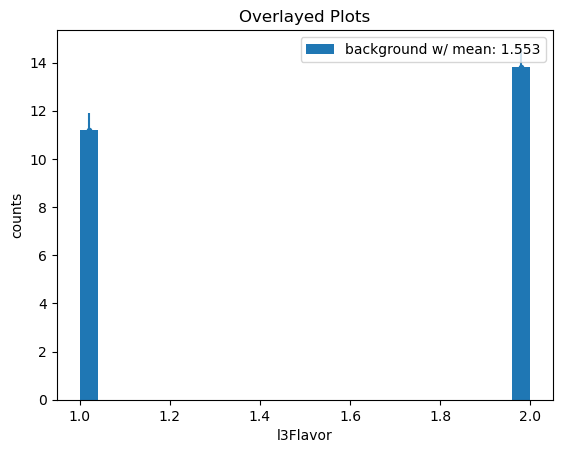

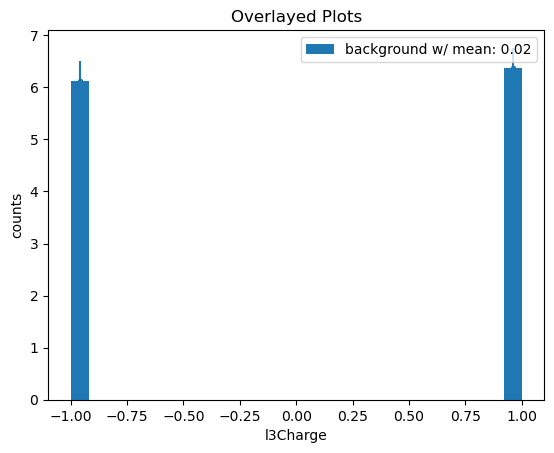

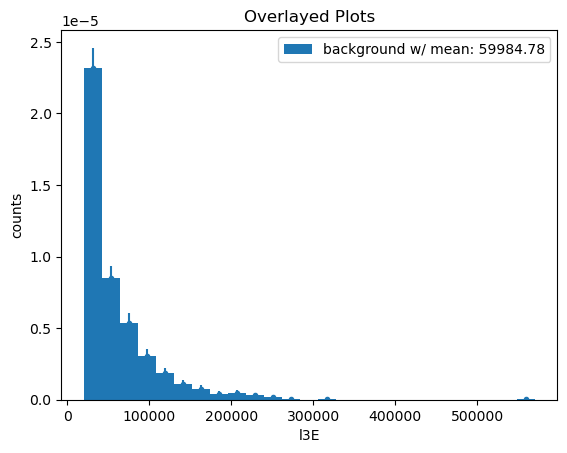

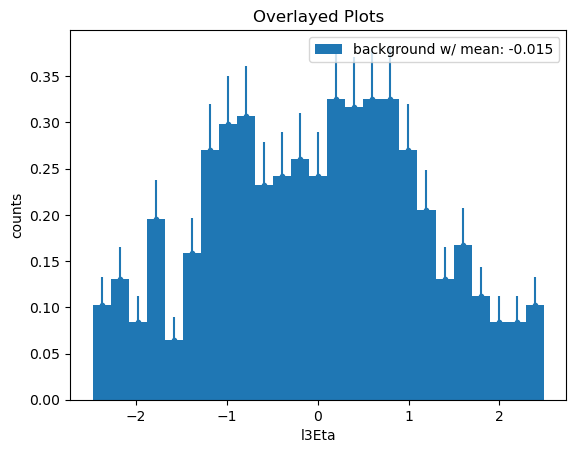

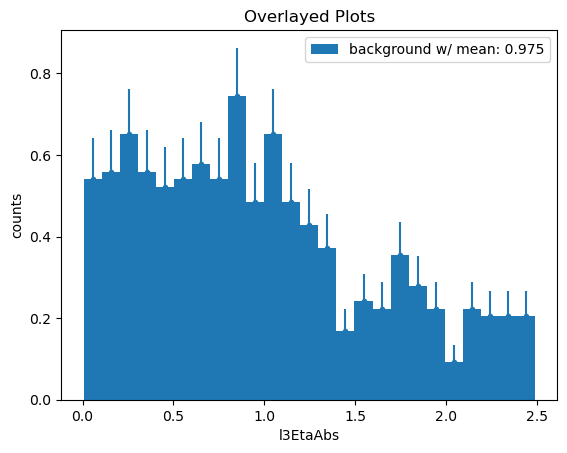

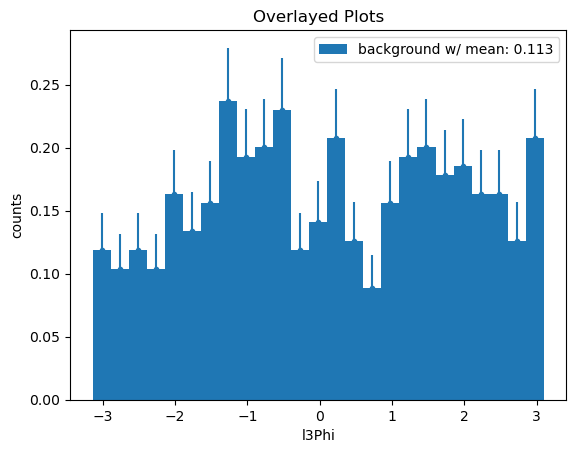

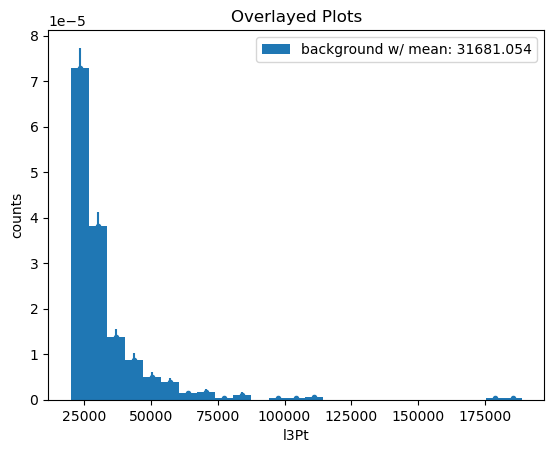

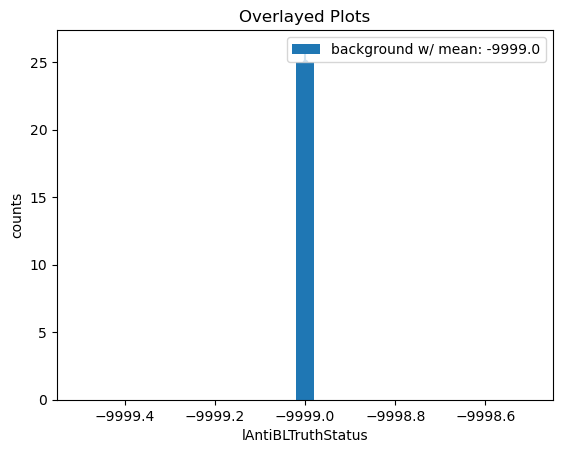

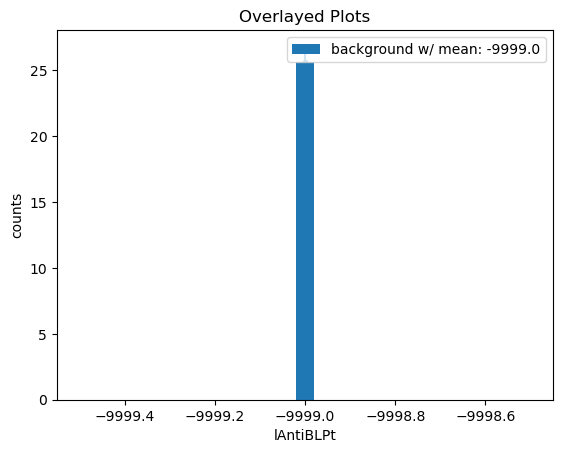

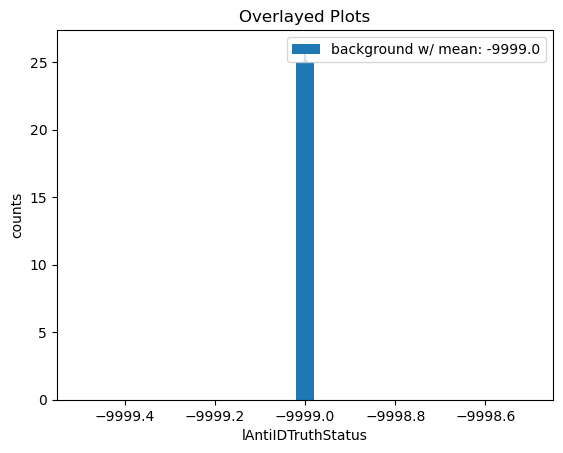

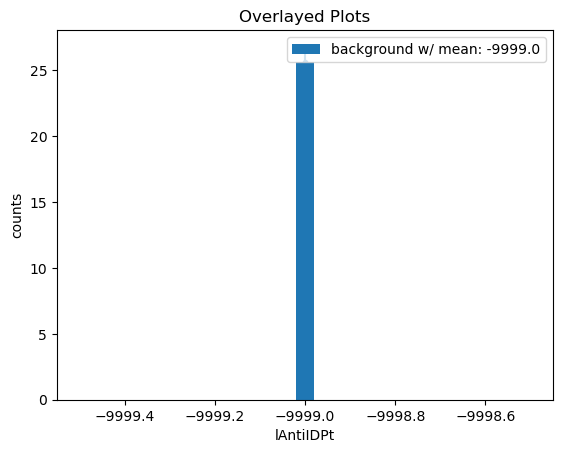

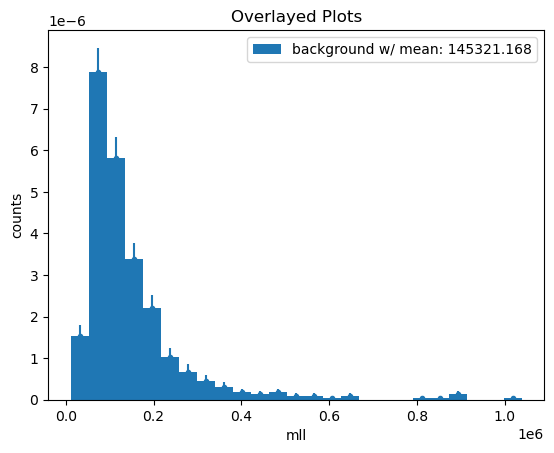

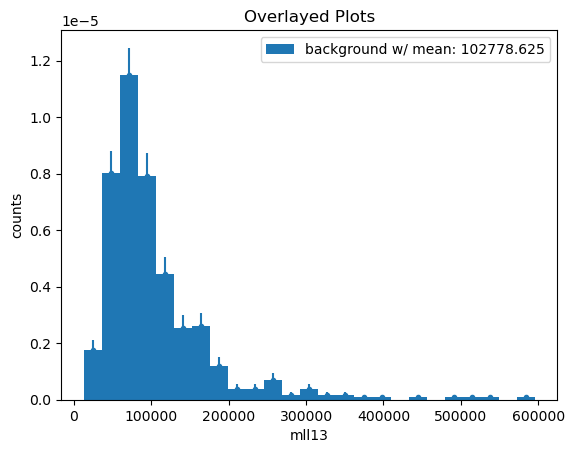

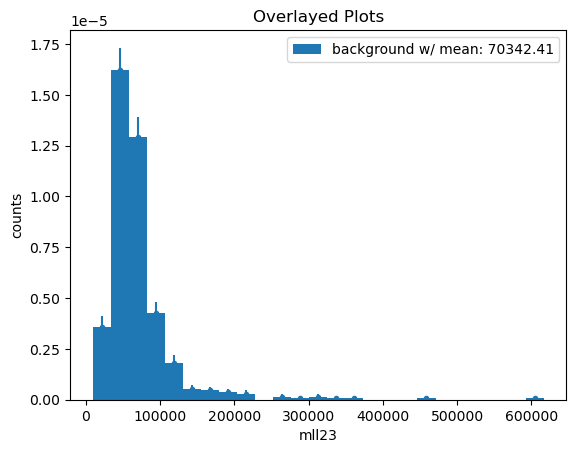

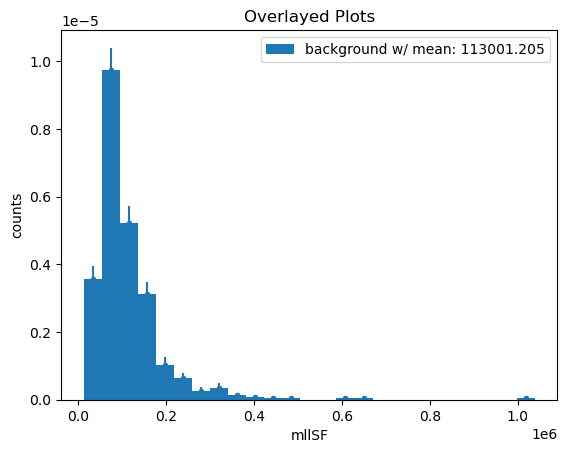

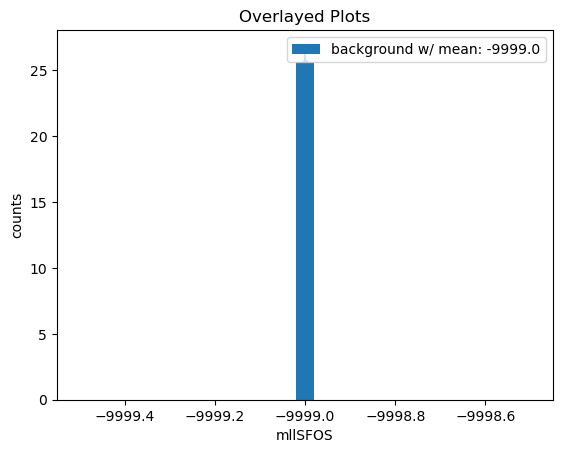

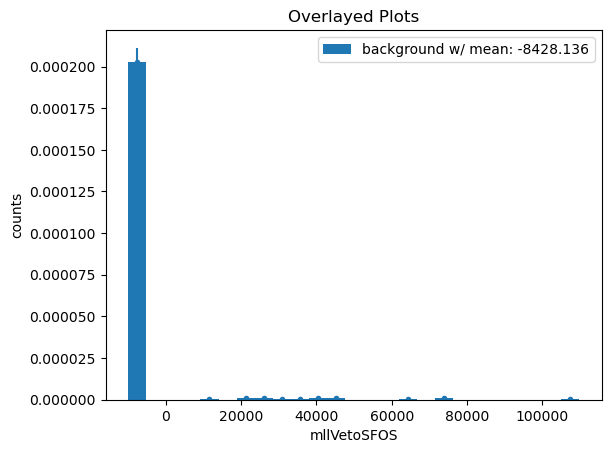

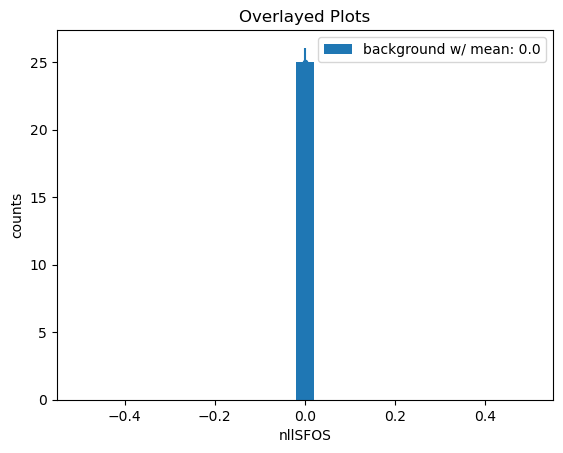

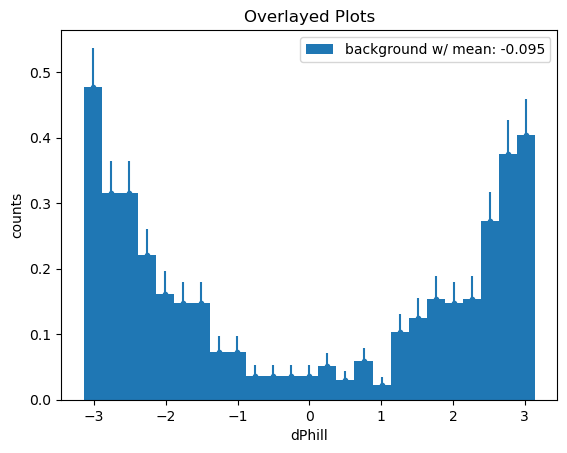

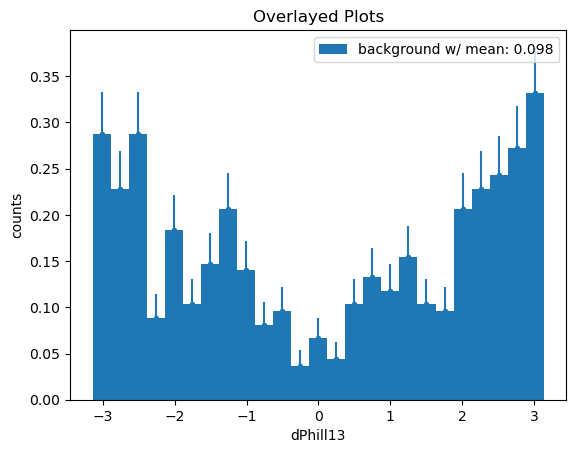

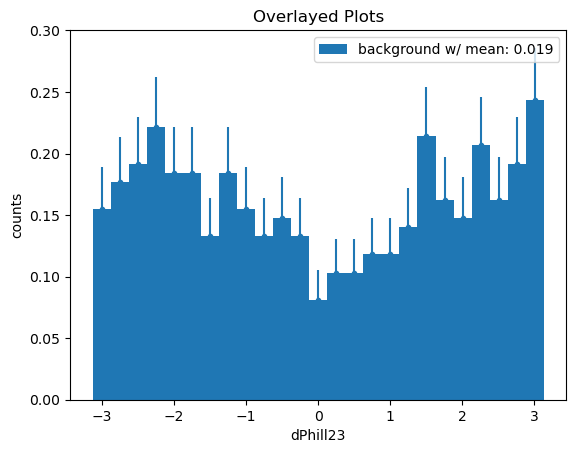

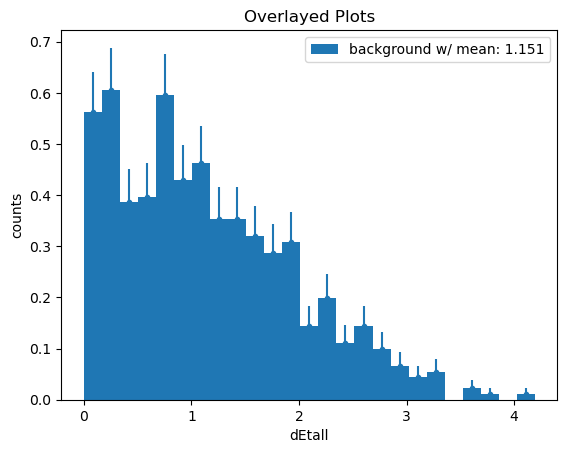

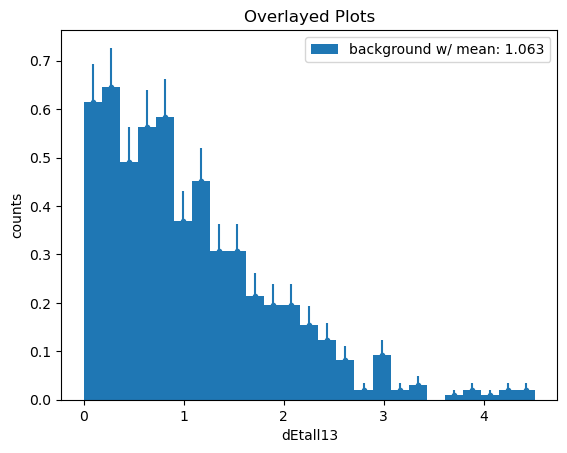

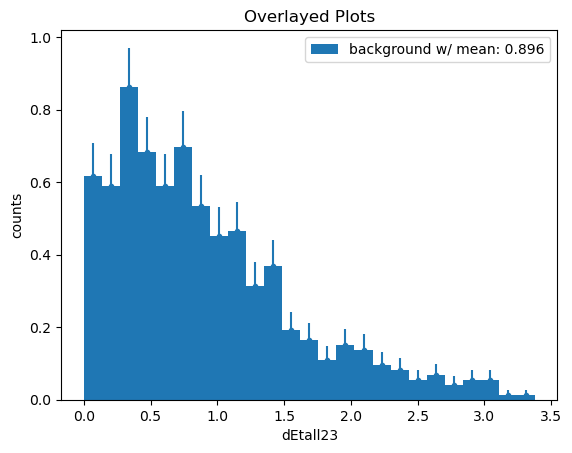

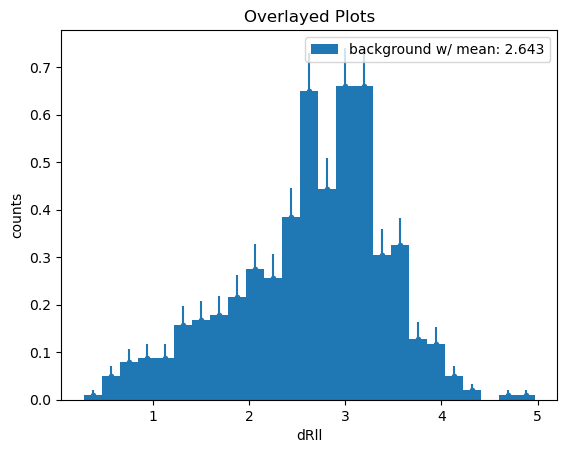

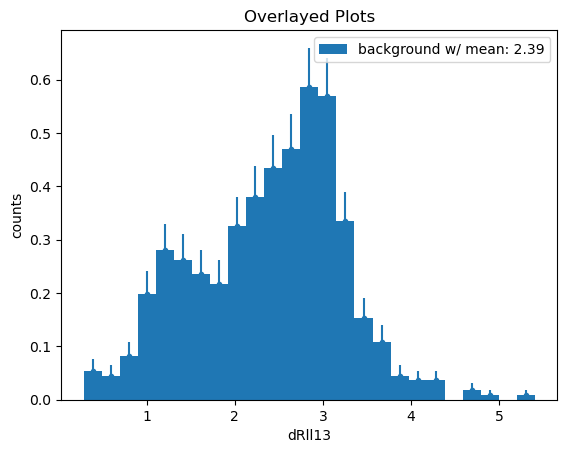

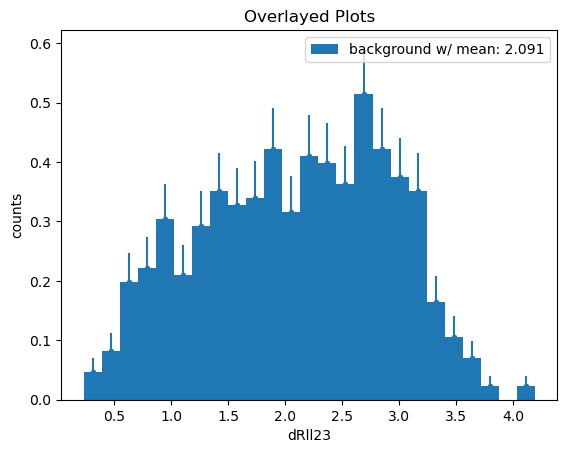

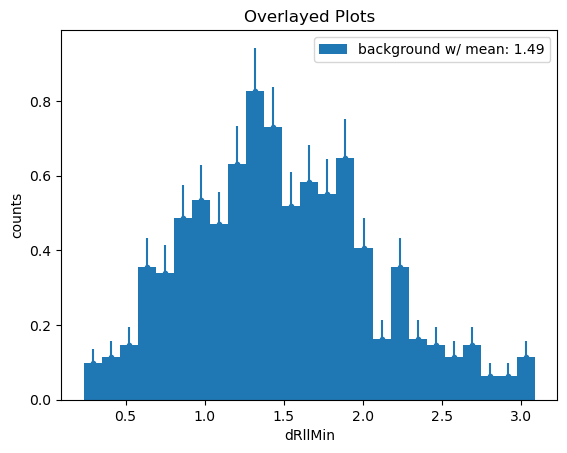

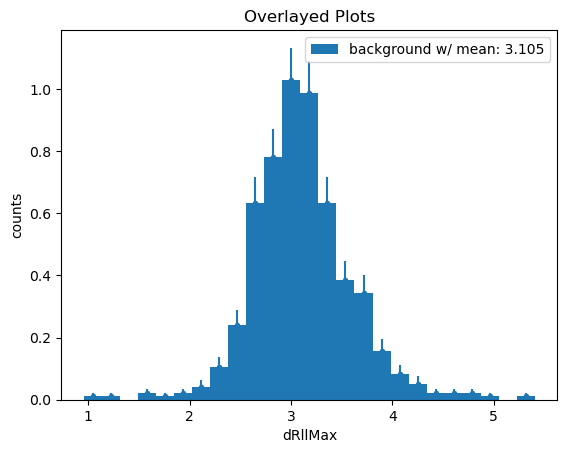

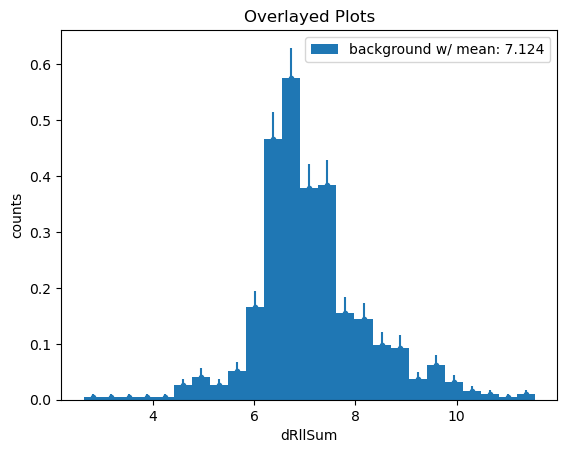

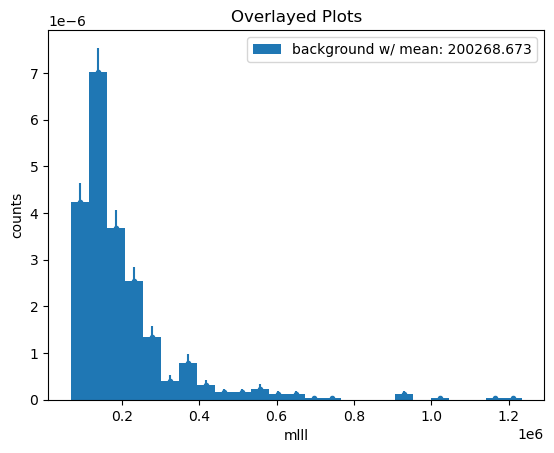

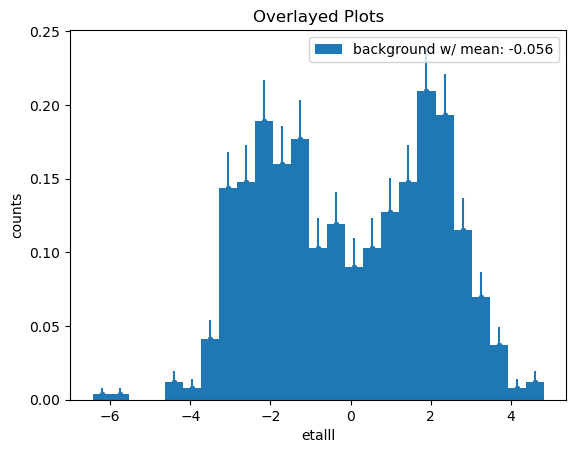

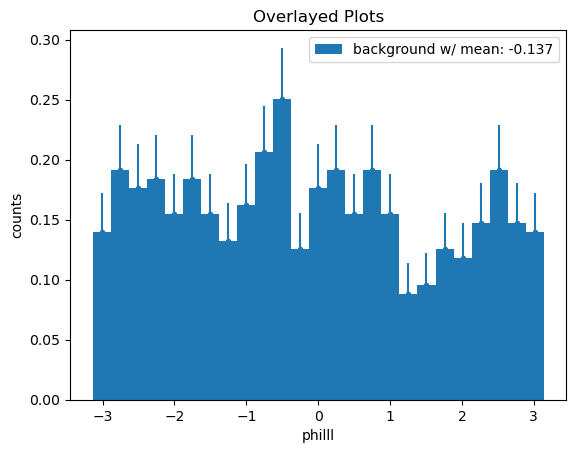

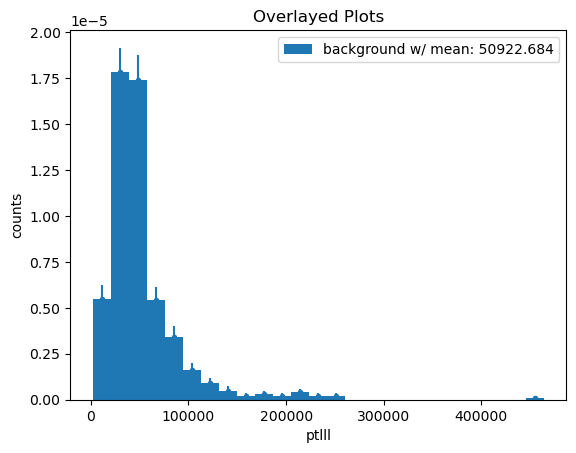

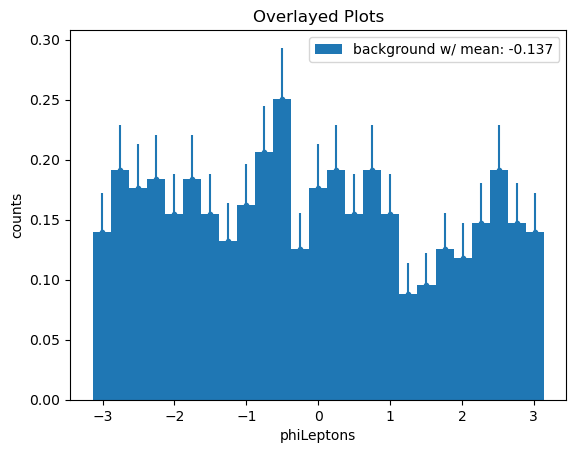

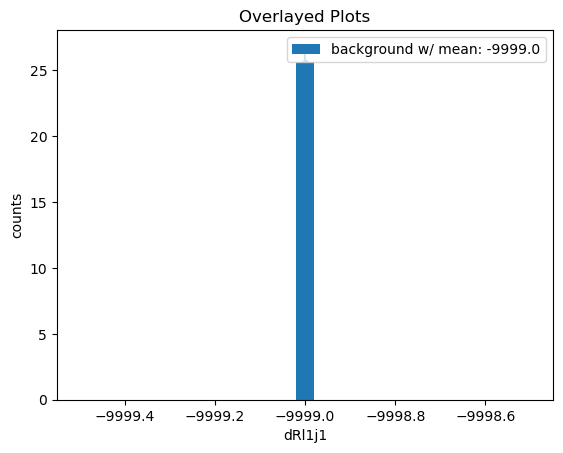

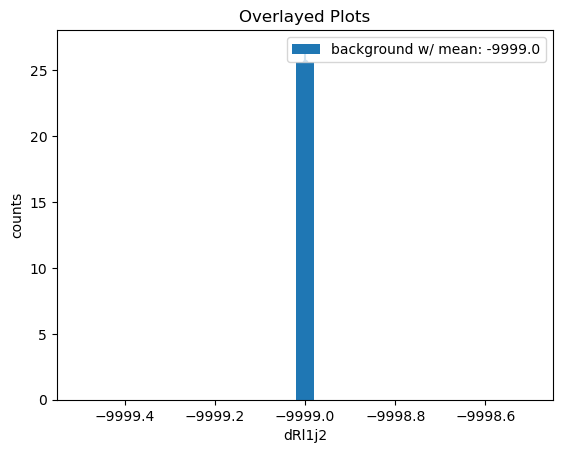

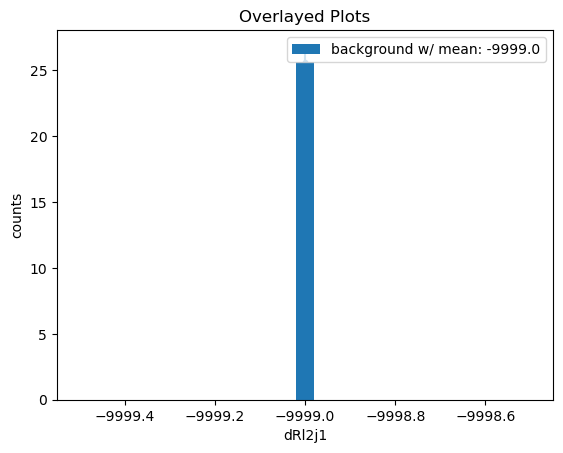

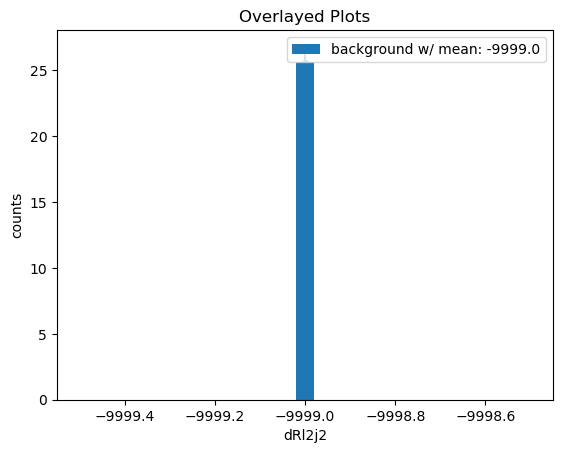

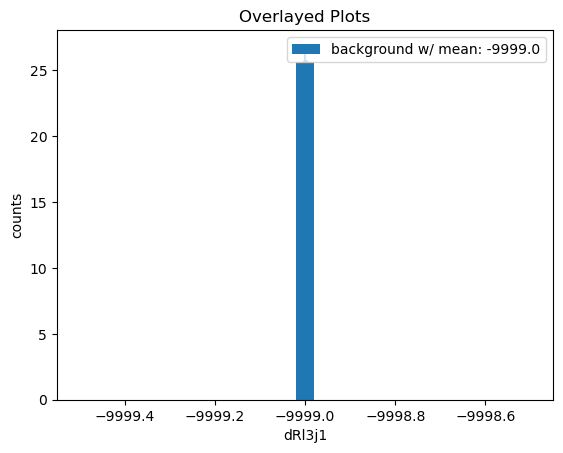

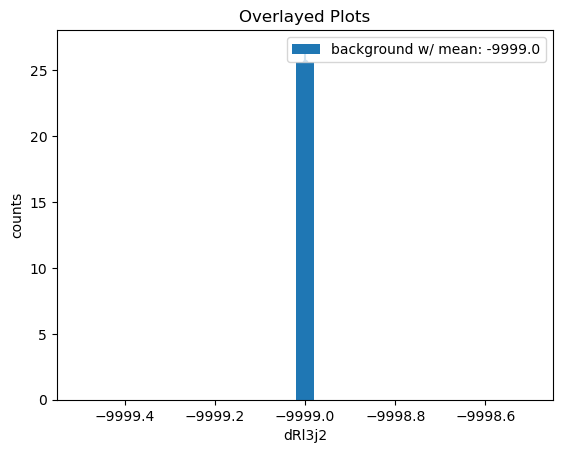

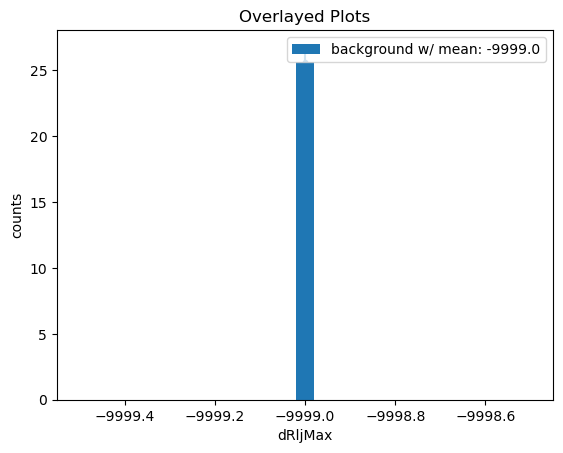

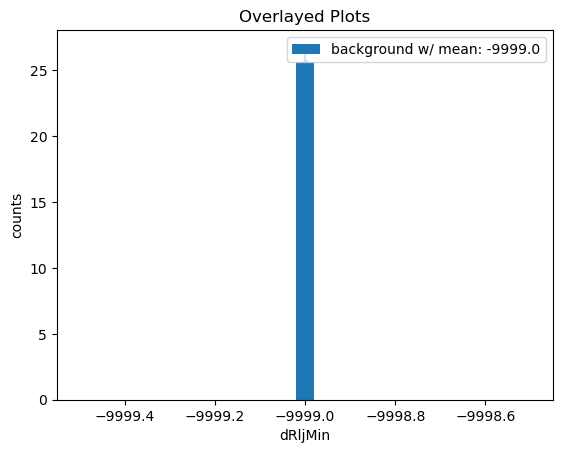

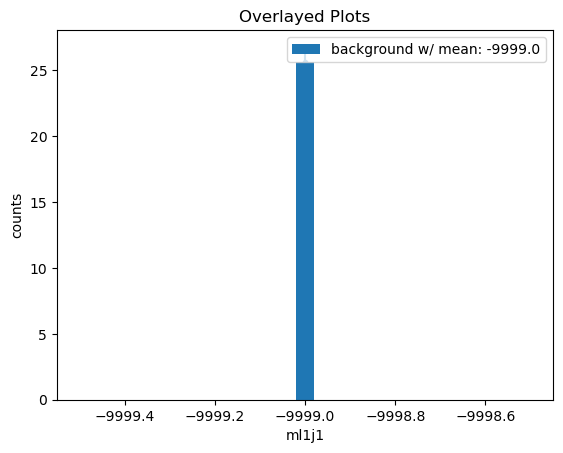

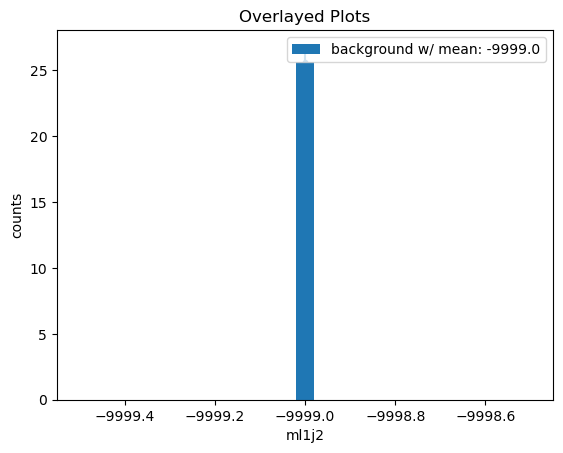

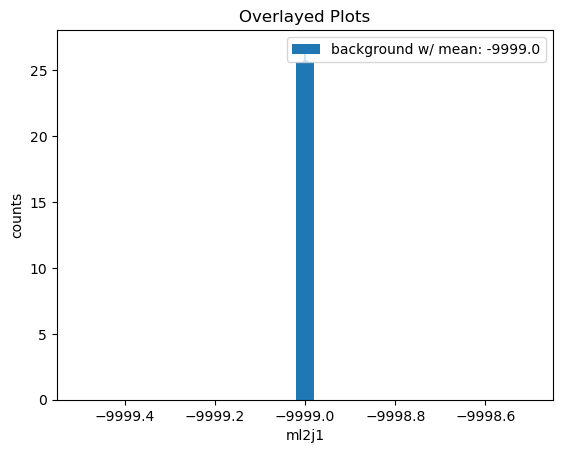

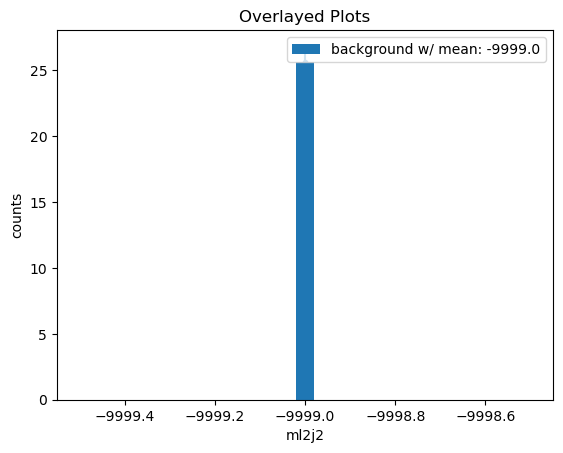

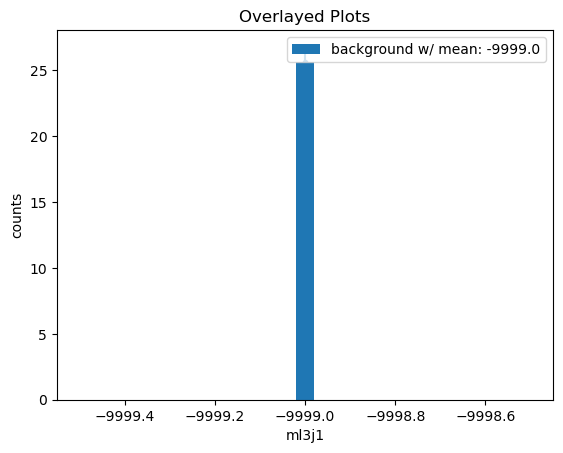

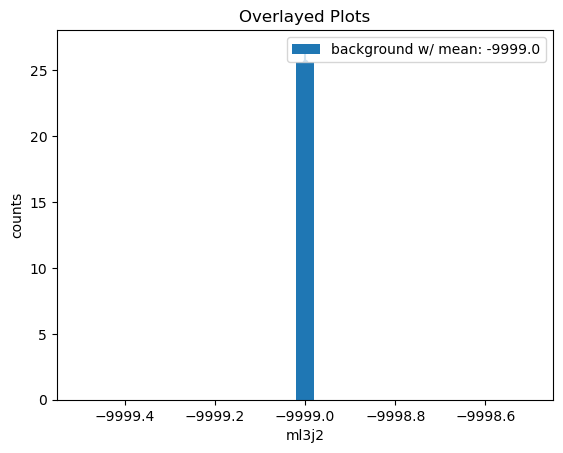

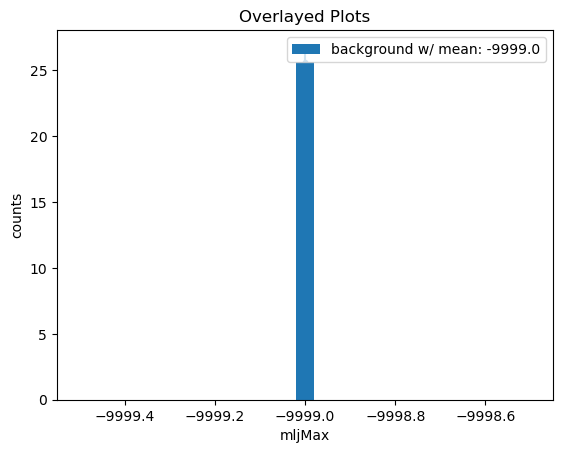

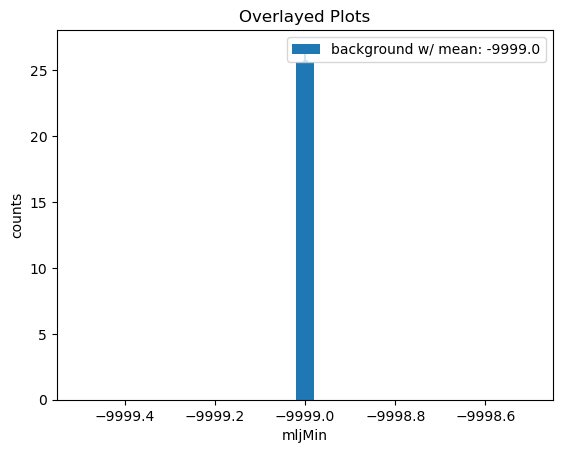

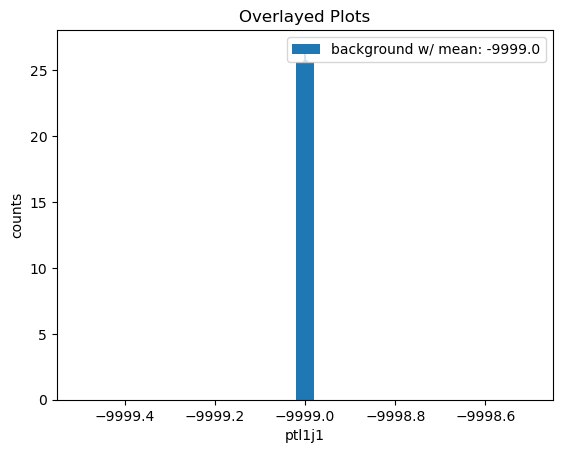

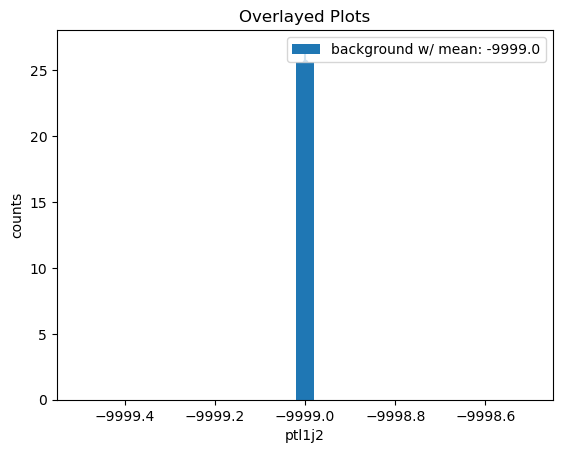

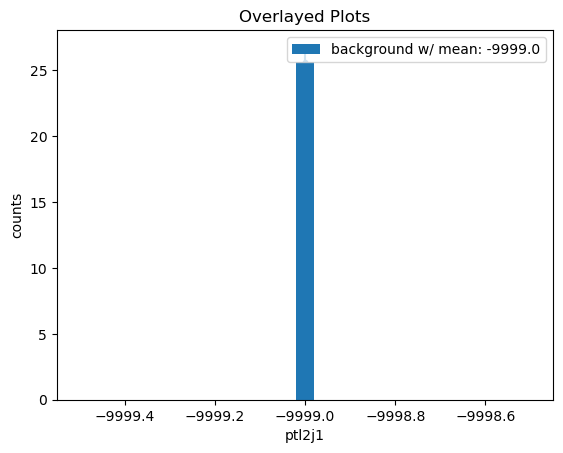

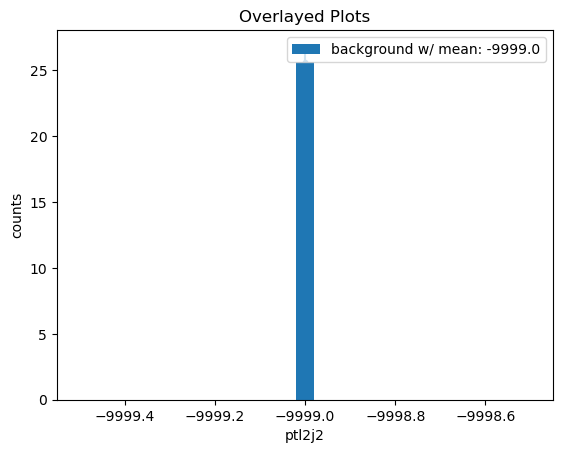

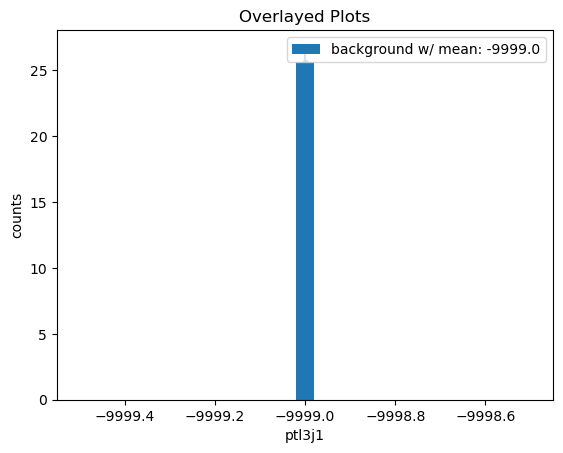

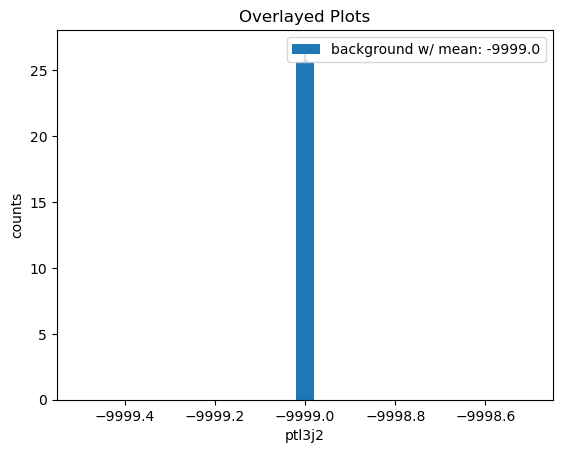

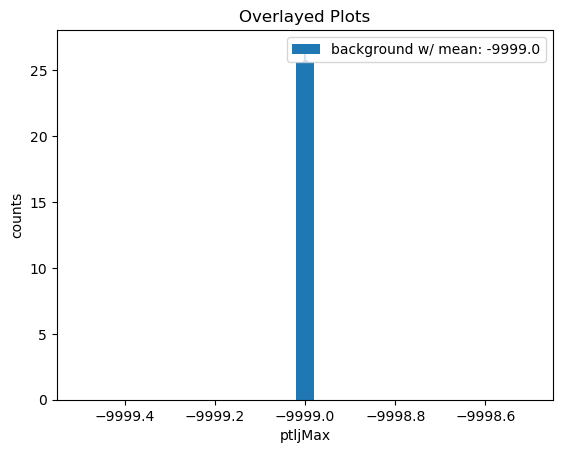

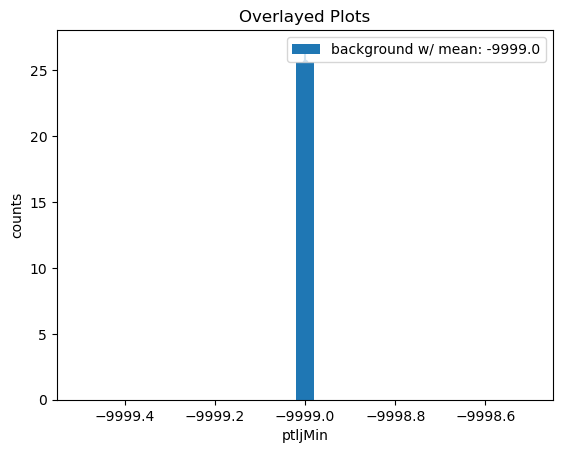

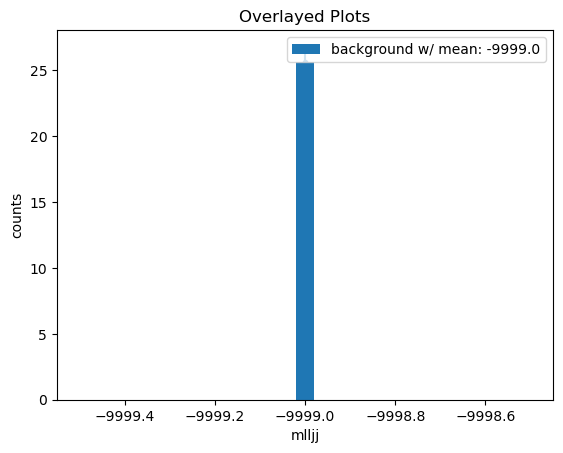

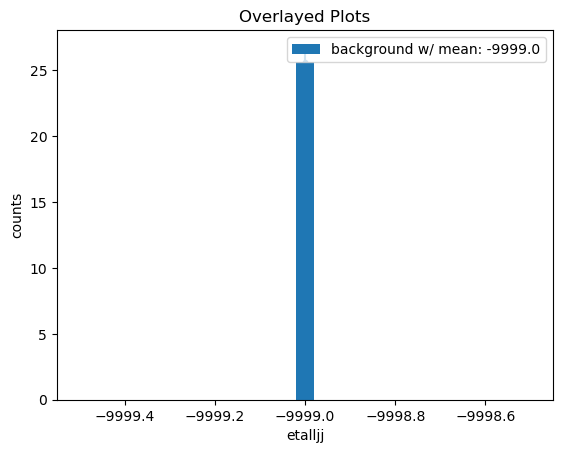

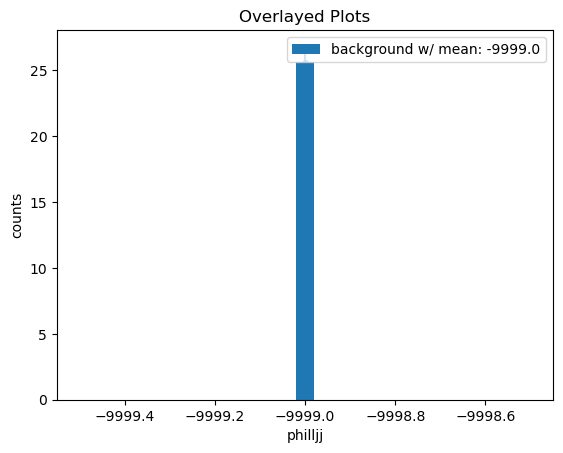

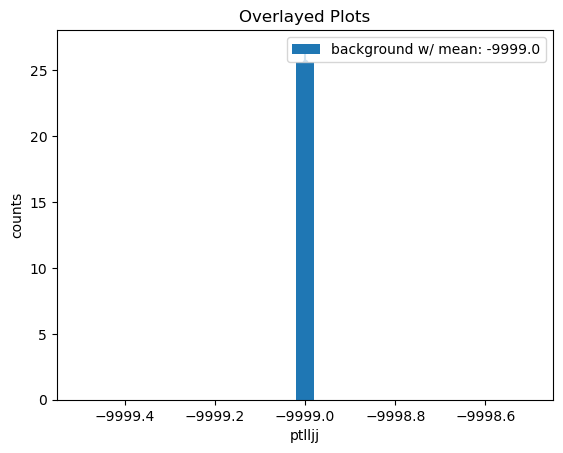

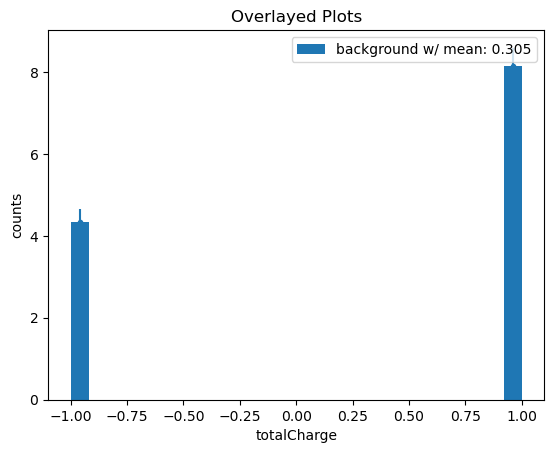

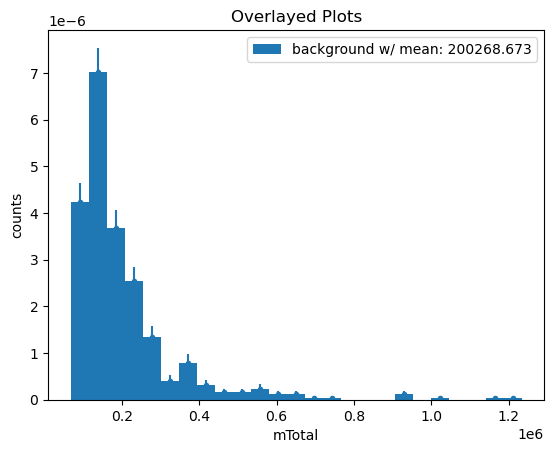

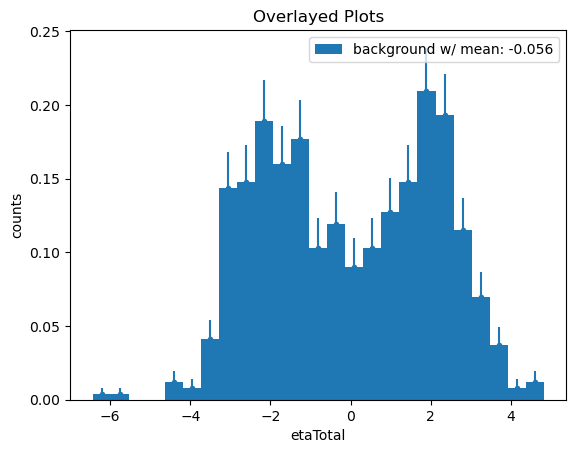

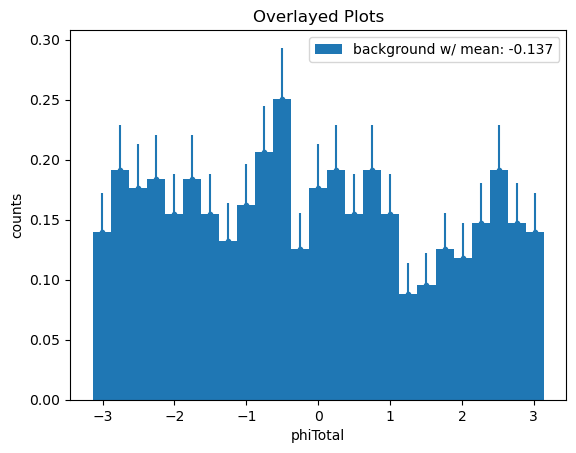

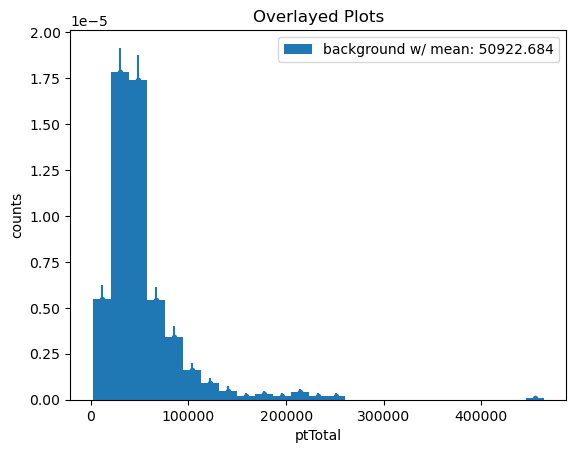

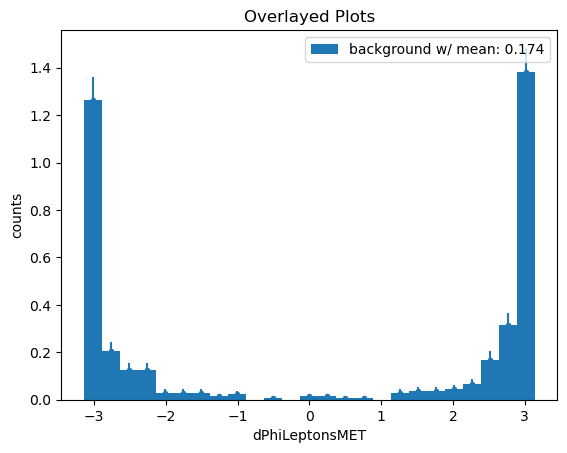

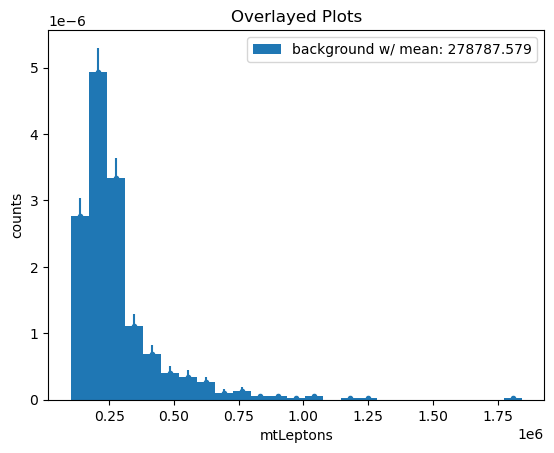

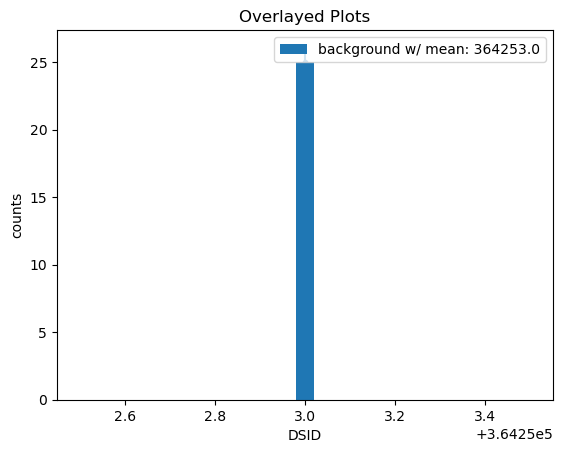

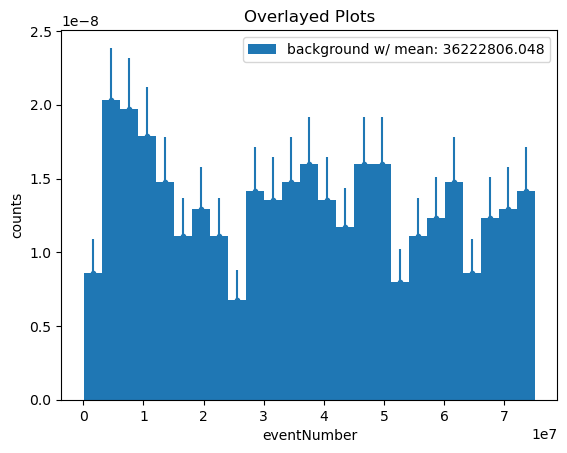

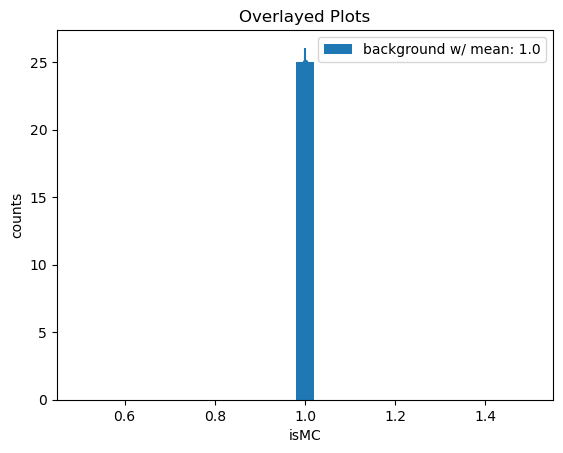

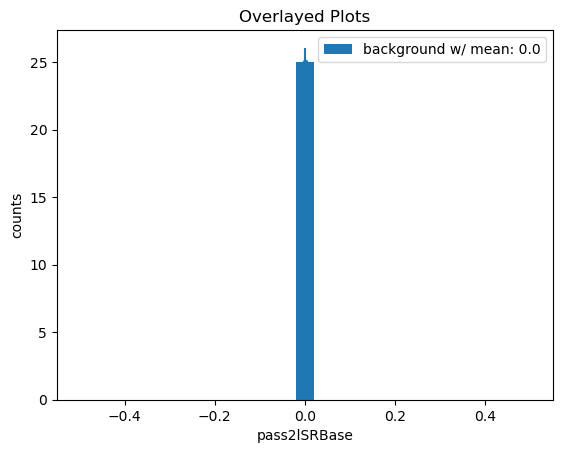

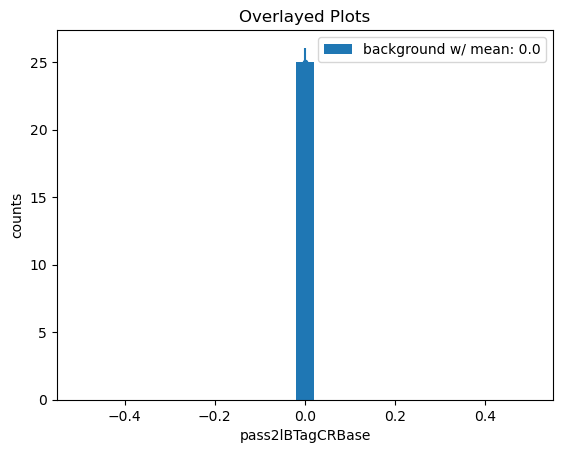

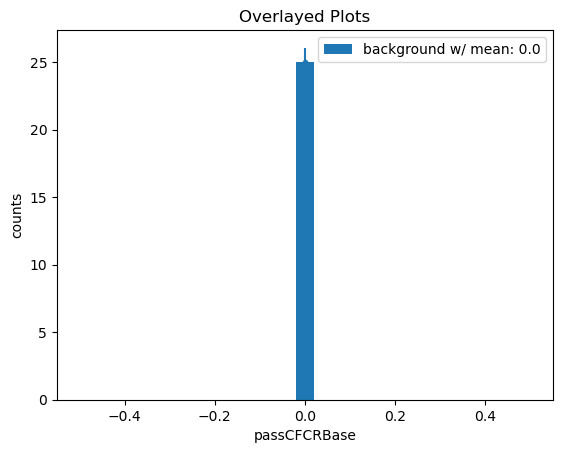

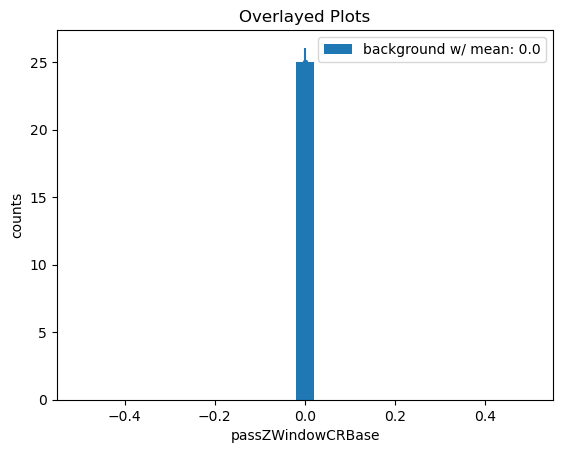

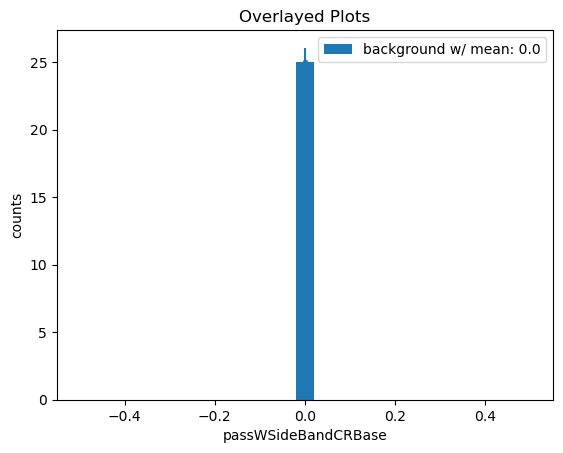

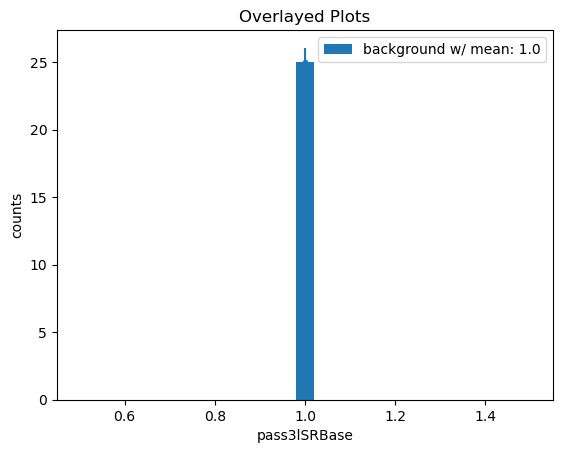

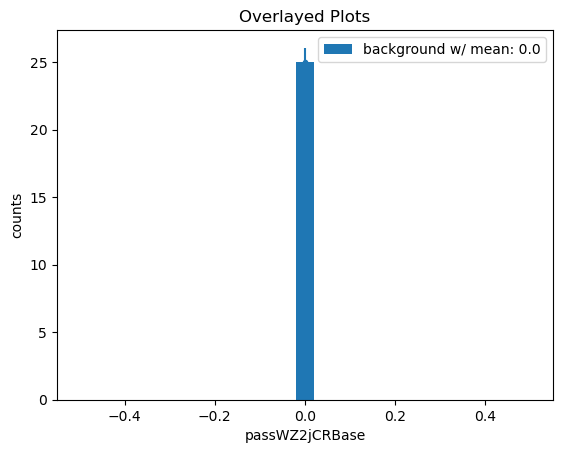

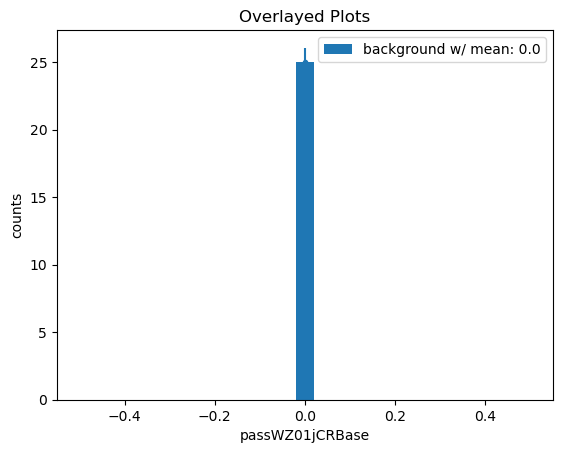

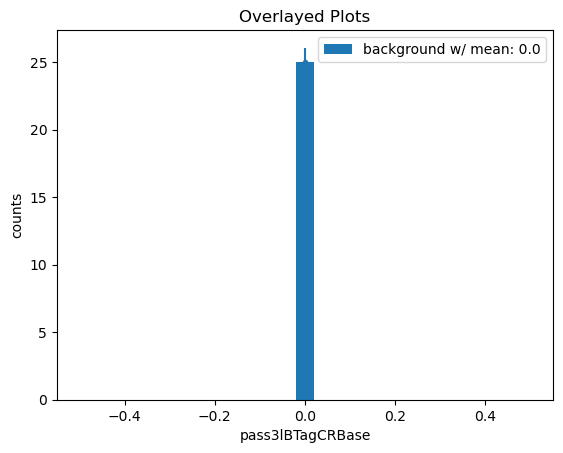

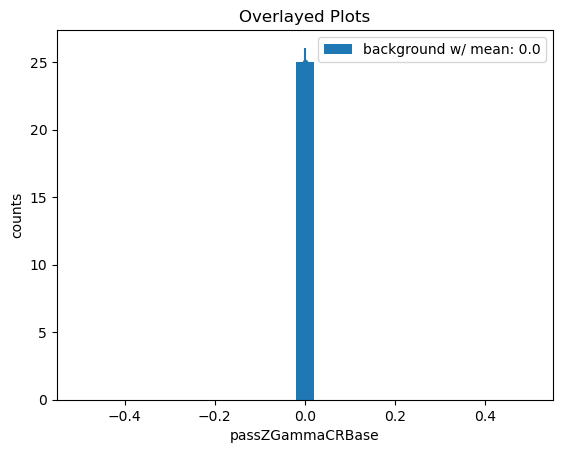

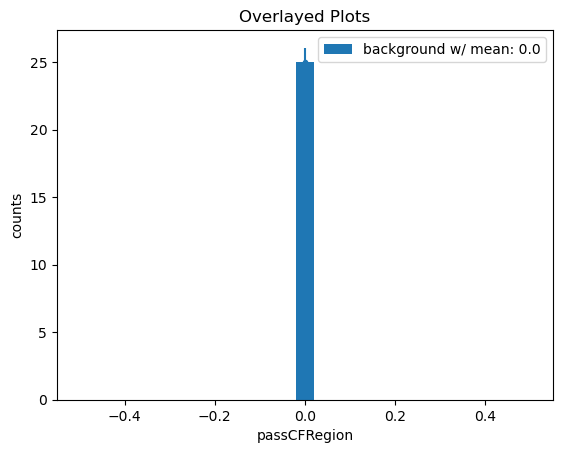

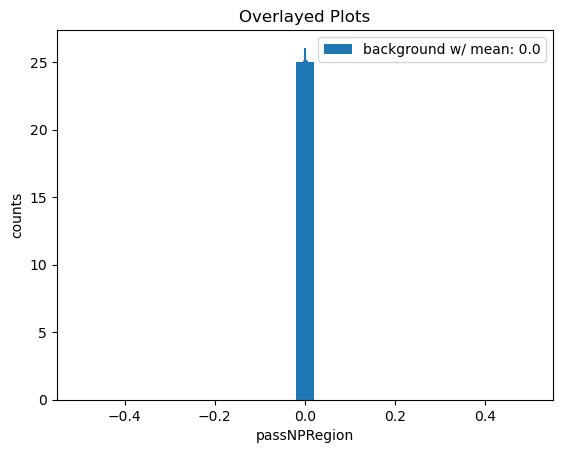

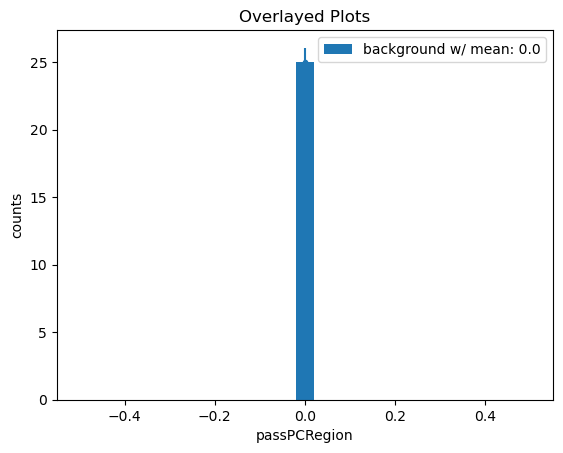

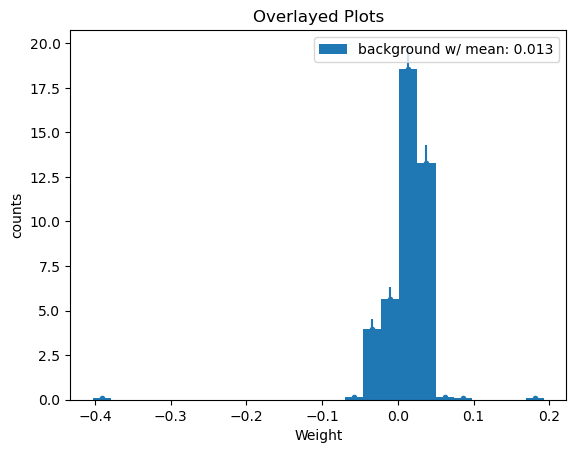

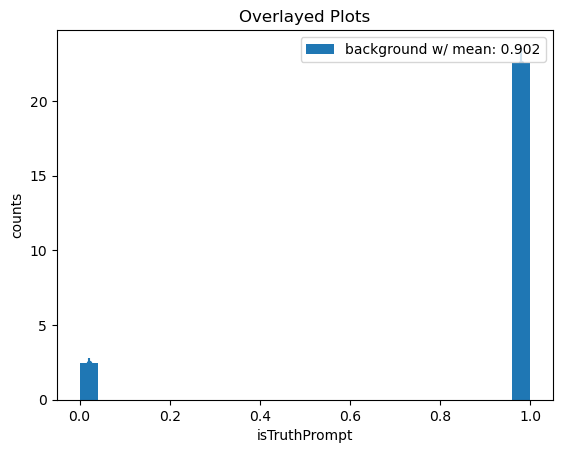

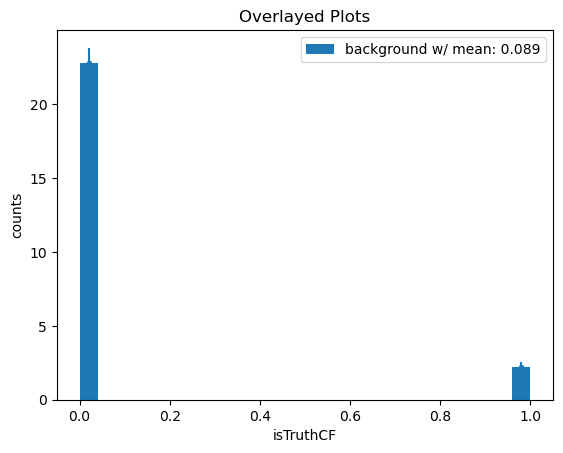

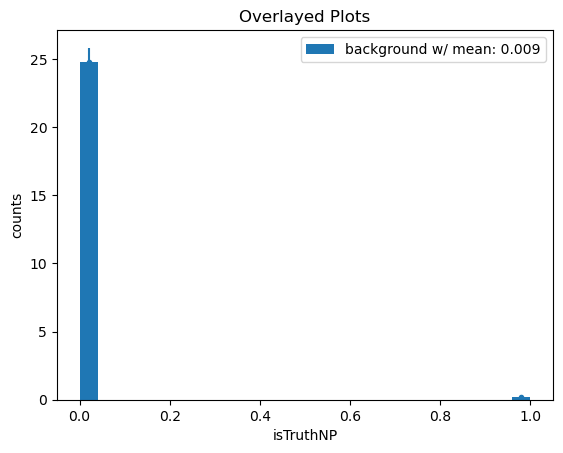

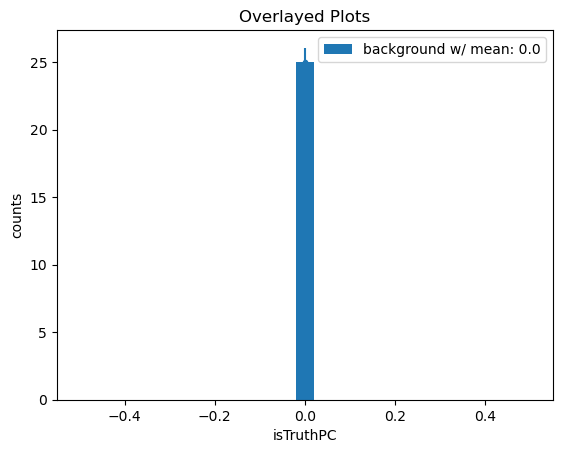

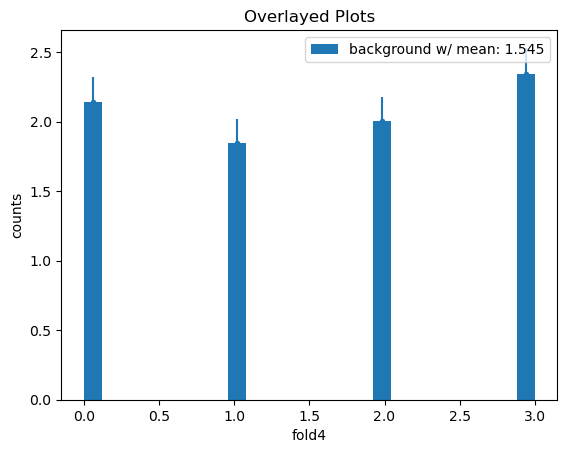

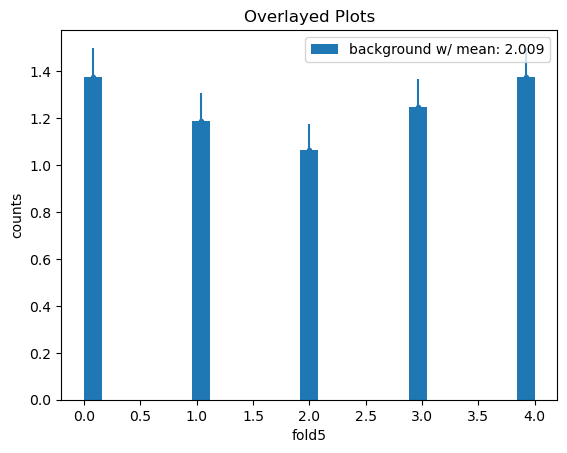

In [45]:
#graphing
for col in branches.keys():
    data = information[col]
    datas = {"background": data}
    graph_data(datas, col)